In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.auto import tqdm

import ddpm_Time_Series_copy
import numpy as np
import pandas as pd
import torch

from sklearn.datasets import make_moons
from torch.utils.data import TensorDataset


import ddpm_Time_Series_copy
from ddpm_Time_Series_copy import TimeSeriesDataset , TimeSeriesTestDataset
from noise_scheduler import NoiseScheduler


import torch
from torch.utils.data import Dataset, DataLoader
import argparse
import os

from torch import nn
from torch.nn import functional as F
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import numpy as np

from positional_embeddings import PositionalEmbedding


from pytorch_tcn import TCN  # Import the TCN class from pytorch-tcn

import json

from sklearn.metrics import classification_report, roc_curve, auc

import seaborn as sns


/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Saving figures and results : 

## WSD107

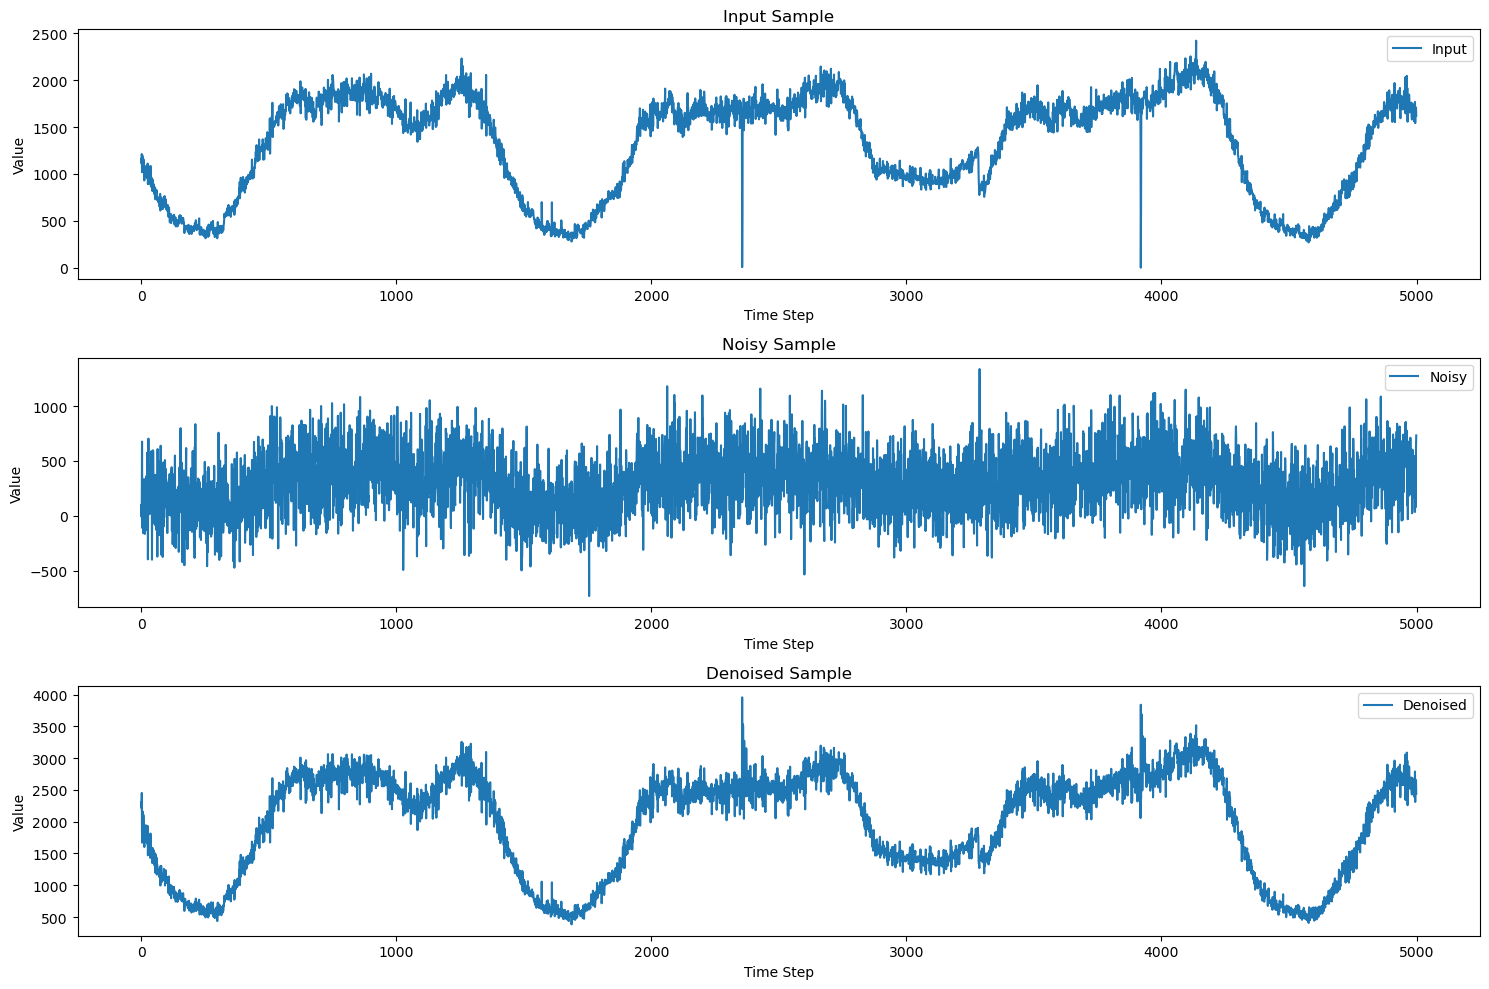

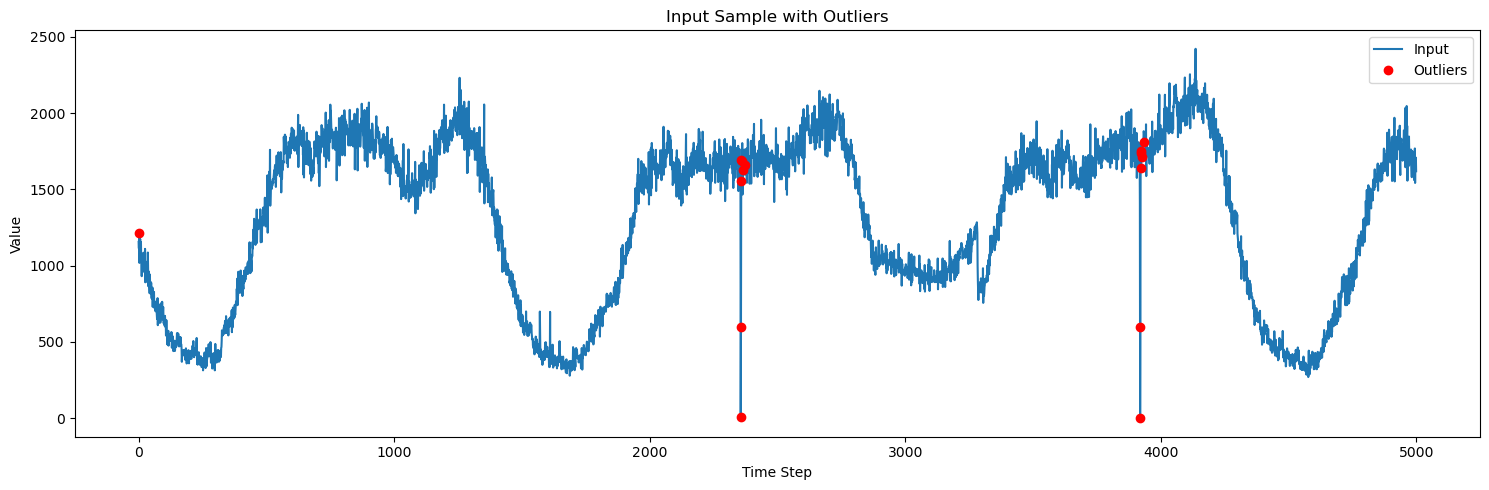

eval timesteps tensor([537, 118,  19, 188, 726, 399, 723, 277, 863, 421, 150, 248, 968, 352,
        256,  21])
Best threshold: tensor(1214.1018)
Best F1 score: 0.4489795918367347
Best AUPRC score: 0.2418549019607843
Best Precision score: 0.7333333333333333
Best Recall score: 0.3235294117647059
Best threshold: tensor(1214.1018)
Best F1 score: 0.3333333333333333
Best AUPRC score: 0.1385217391304348
Best Precision score: 0.55
Best Recall score: 0.2391304347826087
Best threshold: tensor(1214.1018)
Best F1 score: 0.26506024096385544
Best AUPRC score: 0.08902645502645501
Best Precision score: 0.4074074074074074
Best Recall score: 0.19642857142857142
Best threshold: tensor(1108.5278)
Best F1 score: 0.3488372093023256
Best AUPRC score: 0.14212857142857144
Best Precision score: 0.5
Best Recall score: 0.26785714285714285
Best threshold: tensor(1108.5278)
Best F1 score: 0.2988505747126437
Best AUPRC score: 0.10427777777777776
Best Precision score: 0.3333333333333333
Best Recall score: 0.2708333333333333
Best threshold: tensor(1214.1018)
Best F1 score: 0.2937062937062937
Best AUPRC score: 0.11151052631578946
Best Precision score: 0.4375
Best Recall score: 0.22105263157894736
Best threshold: tensor(1108.5278)
Best F1 score: 0.35064935064935066
Best AUPRC score: 0.14366244424620875
Best Precision score: 0.4576271186440678
Best Recall score: 0.28421052631578947
Best threshold: tensor(1108.5278)
Best F1 score: 0.30917874396135264
Best AUPRC score: 0.11097254021698467
Best Precision score: 0.32323232323232326
Best Recall score: 0.2962962962962963
Best threshold: tensor(1214.1018)
Best F1 score: 0.24539877300613497
Best AUPRC score: 0.07307727546714889
Best Precision score: 0.25316455696202533
Best Recall score: 0.23809523809523808
Best threshold: tensor(1108.5278)
Best F1 score: 0.35294117647058826
Best AUPRC score: 0.14386813186813188
Best Precision score: 0.46153846153846156
Best Recall score: 0.2857142857142857
Best threshold: tensor(1214.1018)
Best F1 score: 0.3076923076923077
Best AUPRC score: 0.11631966873706004
Best Precision score: 0.43478260869565216
Best Recall score: 0.23809523809523808
Best threshold: tensor(1214.1018)
Best F1 score: 0.30303030303030304
Best AUPRC score: 0.10299259259259258
Best Precision score: 0.3333333333333333
Best Recall score: 0.2777777777777778
Best threshold: tensor(1214.1018)
Best F1 score: 0.42105263157894735
Best AUPRC score: 0.2039034213098729
Best Precision score: 0.6060606060606061
Best Recall score: 0.3225806451612903
Best threshold: tensor(1214.1018)
Best F1 score: 0.4233576642335766
Best AUPRC score: 0.18830085470085473
Best Precision score: 0.4461538461538462
Best Recall score: 0.4027777777777778
Best threshold: tensor(1214.1018)
Best F1 score: 0.32323232323232326
Best AUPRC score: 0.12260298507462686
Best Precision score: 0.23880597014925373
Best Recall score: 0.5
Best threshold: tensor(1214.1018)
Best F1 score: 0.47368421052631576
Best AUPRC score: 0.23758260869565218
Best Precision score: 0.6
Best Recall score: 0.391304347826087
F1 score: 0.34368654551477423
AUPRC score: 0.14191265590930915
Precision score: 0.4447670561777277
Recall score: 0.2972302286753181

## NAB 

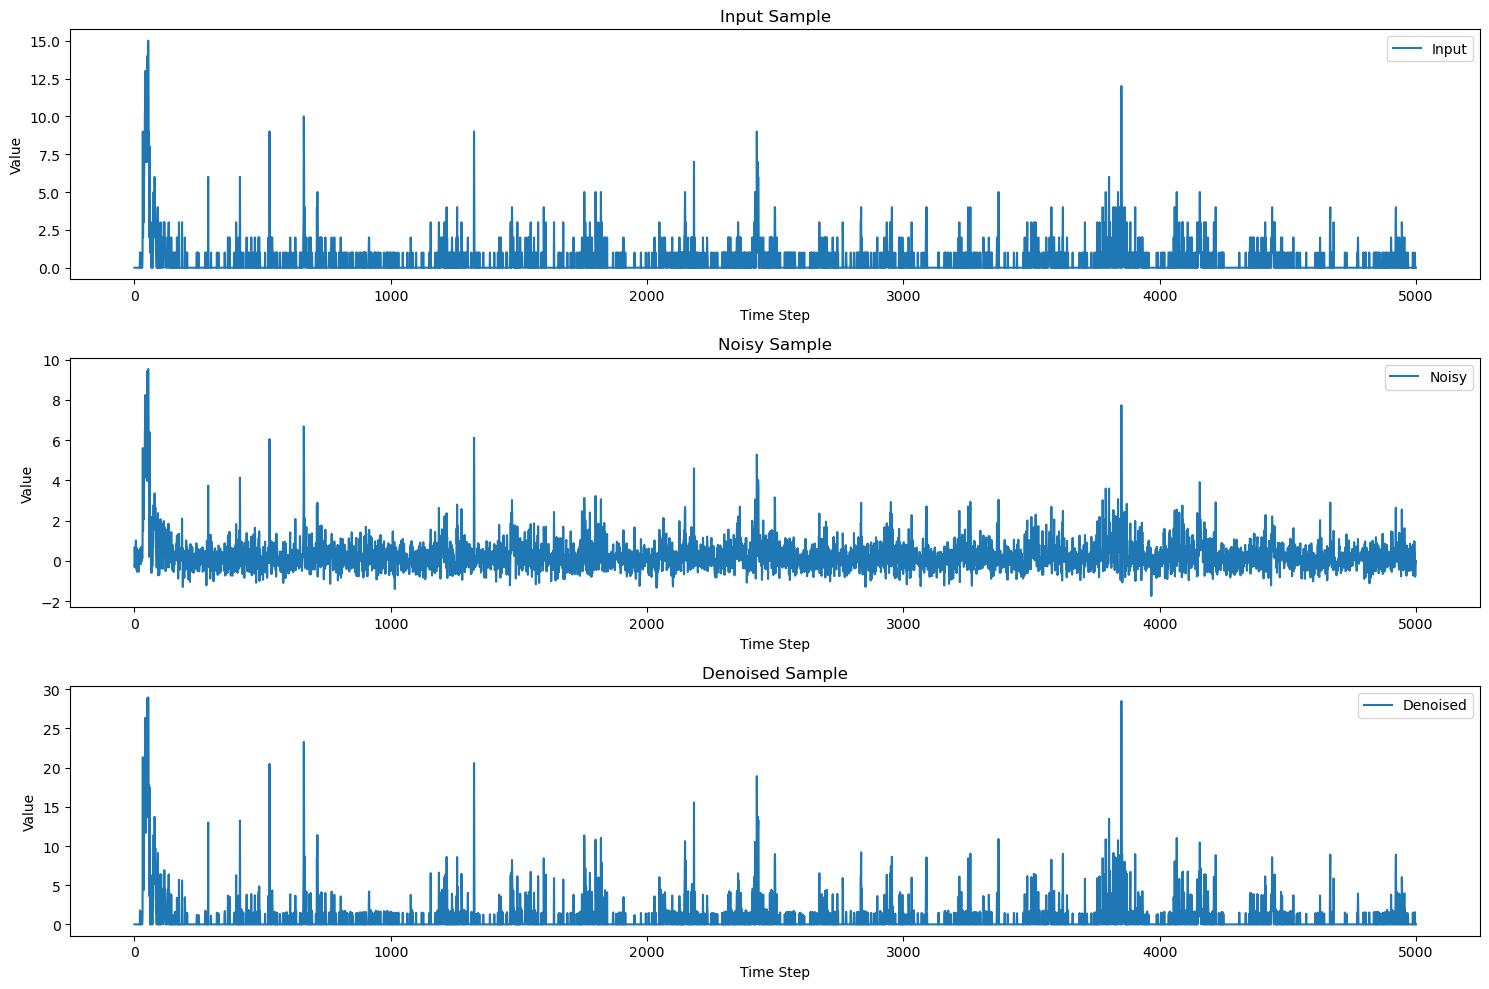

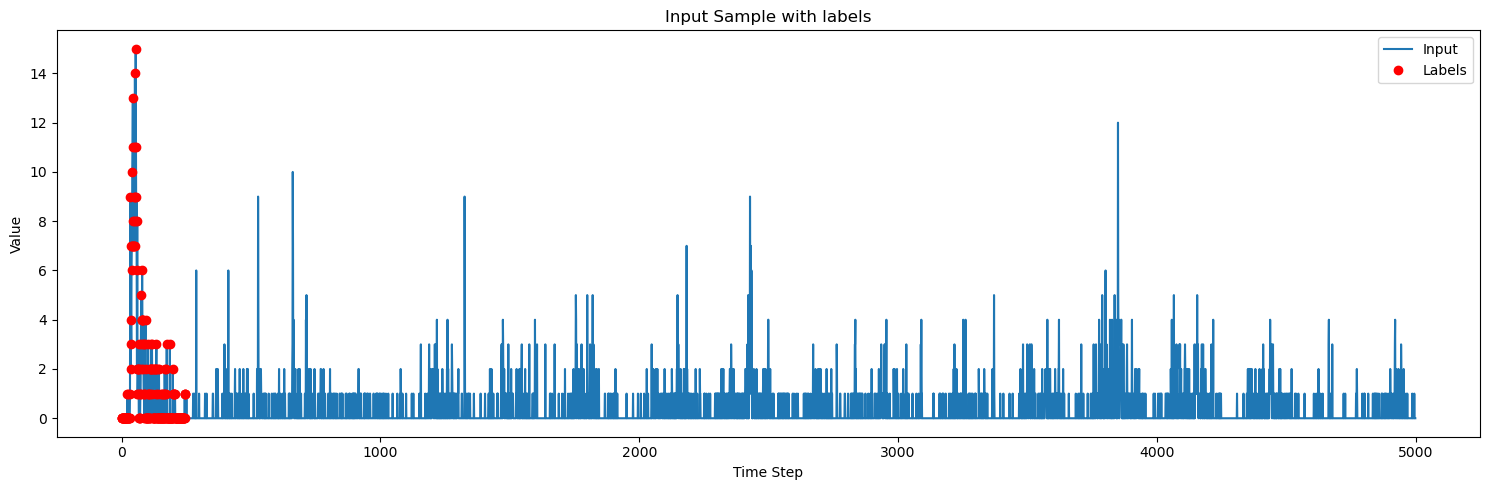

eval timesteps tensor([634, 451, 626, 721])
Best threshold: tensor(2.0974)
Best F1 score: 0.21176470588235294
Best AUPRC score: 0.08645831779102034
Best Precision score: 0.25280898876404495
Best Recall score: 0.18218623481781376
Best threshold: tensor(1.1039)
Best F1 score: 0.027586206896551724
Best AUPRC score: 0.015505956613219183
Best Precision score: 0.01675977653631285
Best Recall score: 0.07792207792207792
Best threshold: tensor(0.5520)
Best F1 score: 0.1319073083778966
Best AUPRC score: 0.08149127348806288
Best Precision score: 0.08638132295719844
Best Recall score: 0.27889447236180903
Best threshold: tensor(0.5520)
Best F1 score: 0.13012895662368112
Best AUPRC score: 0.08106765017749298
Best Precision score: 0.08486238532110092
Best Recall score: 0.27889447236180903
F1 score: 0.1253467944451206
AUPRC score: 0.06613079951744885
Precision score: 0.11020311839466429
Recall score: 0.20447431436587743

# Complete Evaluation

In [3]:
class Config:
    def __init__(self, config_dict):
        for key, value in config_dict.items():
            setattr(self, key, value)

In [4]:
# training testing imports 
import train_test_fonctions
from train_test_fonctions import calculate_f1_auprc_score, plot_samples, plot_predictions, trainer, tester, train_tracker, z_score_outliers, modified_z_score_outliers, iqr_outliers, iqr_collective_outliers
from train_test_fonctions import train_model, test_model, process_directory, trainer_all_in_one, absolute_difference_outliers

## WSD dataset

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from pytorch_tcn import TCN  # Import the TCN class from pytorch-tcn

sequence_length = 5000
input_size = 1  # Assuming 1D time series data

base_config = {
  "data_path": "../datasets/UTS/WSD/107",
  "output_dir": "output_WSD",
  "train_batch_size": 16,
  "eval_batch_size": 1,
  "num_epochs": 5,
  
  "learning_rate": 0.0001,
  "num_timesteps": 1000,
  "beta_schedule": "linear",
  "embedding_size": 128,
  "hidden_size": 128,
  "hidden_layers": 3,
  "time_embedding": "sinusoidal",
  "input_embedding": "sinusoidal",
  "save_eval_step": 10,
  "experiment_name": "NonName",
  "beta_start": 0.0001,
  "beta_end": 0.02,
  "save_model_epochs": 1
}

In [ ]:
import os

data_folder = "../datasets/UTS/NAB"

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
    
        # change datapath in the config
        base_config["data_path"] = data_path
        base_config["output_dir"] = os.path.join("output_WSD", dir)
        
        print(base_config)
        # Create Config object
        config = Config(base_config)
        
        print(config.data_path)

        # Initialize the new TCN model
        model = TCN(
            num_inputs=input_size,  # Number of input channels
            num_channels=[64, 128, 256, 512,256,128,64,1],  # Number of channels in each residual block
            kernel_size=3,  # Size of the convolution kernel
            dilations=None,  # Dilation sizes
            dilation_reset=None,  # Reset dilation size
            dropout=0.2,  # Dropout rate
            causal=True,  # Causal convolutions for real-time applications
            use_norm='weight_norm',  # Normalization method
            activation='relu',  # Activation function
            kernel_initializer='xavier_uniform',  # Weight initializer
            use_skip_connections=False,  # Skip connections
            input_shape='NLC',  # Input shape format ('NCL' or 'NLC') [16, 5000, 1] for NLC
            embedding_shapes=None,  # Embedding shapes
            embedding_mode='add',  # Embedding mode ('add' or 'concat')
            use_gate=False,  # Use gated linear unit
            lookahead=0,  # Lookahead for future time steps
            output_projection=None,  # Output projection
            output_activation=None,  # Output activation
        )

        noise_scheduler = NoiseScheduler(
            num_timesteps=config.num_timesteps,
            beta_start=config.beta_start,
            beta_end=config.beta_end,
            beta_schedule=config.beta_schedule
        )

        # Set up dataset and dataloader
        dataset = TimeSeriesDataset(config.data_path,sequence_length=5000, stride=500,normalize=False)

        # Set up dataset and dataloader for test data
        test_dataset = TimeSeriesTestDataset(config.data_path, sequence_length=5000, stride=500, normalize=False) #mean=dataset.mean, std=dataset.std)

        #================================================================================================
        # define a pd dataframe to save the results, with the data folder name as the index
        results_df = pd.DataFrame(columns=["data_folder", "average_f1", "average_auprc"])
        results_df.set_index("data_folder", inplace=True)
        
        # train the model and test it
        model, losses = trainer(config, model, noise_scheduler, dataset)
        train_tracker(config, model, dataset)
        average_f1, average_auprc = tester(config, model, noise_scheduler, test_dataset)
        
        # save the results in the dataframe
        results_df.loc[dir] = [average_f1, average_auprc]
        
        print("training and results done for", dir)
        
# save the results in a csv file in outtput directory
results_df.to_csv(os.path.join(config.output_dir, "results.csv"))


# NAB dataset - all in one 

In [8]:

base_config = {
  "data_path":  "../datasets/UTS/NAB",
  "output_dir": "output_NAB_gaussian4",
  "train_batch_size": 3,
  "eval_batch_size": 1,
  "num_epochs": 20,
  
  "learning_rate": 0.0001,
  "num_timesteps": 100,
  "beta_schedule": "linear",
  "embedding_size": 128,
  "hidden_size": 128,
  "hidden_layers": 3,
  "time_embedding": "sinusoidal",
  "input_embedding": "sinusoidal",
  "save_eval_step": 10,
  "experiment_name": "NonName",
  "beta_start": 0.05,
  "beta_end": 0.1,
  "save_model_epochs": 1
}

sequence_length = 2500
input_size = 1  # Assuming 1D time series data
stride = 100


In [9]:
# all in one training and testing
import os
    
config = Config(base_config)

# Initialize the new TCN model
model = TCN(
    num_inputs=input_size,  # Number of input channels
    num_channels=[64, 128,256,512,256,128,64,1],  # Number of channels in each residual block
    kernel_size=3,  # Size of the convolution kernel
    dilations=None,  # Dilation sizes
    dilation_reset=None,  # Reset dilation size
    dropout=0.2,  # Dropout rate
    causal=True,  # Causal convolutions for real-time applications
    use_norm='weight_norm',  # Normalization method
    activation='relu',  # Activation function
    kernel_initializer='xavier_uniform',  # Weight initializer
    use_skip_connections=False,  # Skip connections
    input_shape='NLC',  # Input shape format ('NCL' or 'NLC') [16, 5000, 1] for NLC
    embedding_shapes=None,  # Embedding shapes
    embedding_mode='add',  # Embedding mode ('add' or 'concat')
    use_gate=False,  # Use gated linear unit
    lookahead=0,  # Lookahead for future time steps
    output_projection=None,  # Output projection
    output_activation=None,  # Output activation
)

noise_scheduler = NoiseScheduler(
    num_timesteps=config.num_timesteps,
    beta_start=config.beta_start,
    beta_end=config.beta_end,
    beta_schedule=config.beta_schedule
)

data_folder = "../datasets/UTS/NAB"

#================================================================================================
# train the model and test it

model, losses = trainer_all_in_one(sequence_length, stride,base_config, config, model, noise_scheduler, data_folder)


Training model...


  0%|          | 0/20 [00:00<?, ?it/s]

{'loss': 2131.466064453125, 'epoch': 0}
{'loss': 2132.38671875, 'epoch': 0}
{'loss': 40.77988052368164, 'epoch': 0}
{'loss': 0.7799255847930908, 'epoch': 0}
{'loss': 359.4352722167969, 'epoch': 0}
{'loss': 87.00323486328125, 'epoch': 0}
{'loss': 6.392131328582764, 'epoch': 0}
{'loss': 560.919189453125, 'epoch': 0}
{'loss': 2.3568053245544434, 'epoch': 0}


  5%|▌         | 1/20 [00:49<15:48, 49.94s/it]

{'loss': 120.00584411621094, 'epoch': 0}
{'loss': 2543.0380859375, 'epoch': 1}
{'loss': 1389.845458984375, 'epoch': 1}
{'loss': 36.7734260559082, 'epoch': 1}
{'loss': 0.7257727980613708, 'epoch': 1}
{'loss': 248.79580688476562, 'epoch': 1}
{'loss': 330.4627380371094, 'epoch': 1}
{'loss': 15.287787437438965, 'epoch': 1}
{'loss': 338.4568786621094, 'epoch': 1}
{'loss': 2.777733564376831, 'epoch': 1}


 10%|█         | 2/20 [01:39<14:54, 49.70s/it]

{'loss': 43.23857879638672, 'epoch': 1}
{'loss': 1148.39404296875, 'epoch': 2}
{'loss': 1741.7437744140625, 'epoch': 2}
{'loss': 37.48920822143555, 'epoch': 2}
{'loss': 0.8284125924110413, 'epoch': 2}
{'loss': 463.64898681640625, 'epoch': 2}
{'loss': 175.6978302001953, 'epoch': 2}
{'loss': 18.717876434326172, 'epoch': 2}
{'loss': 246.59356689453125, 'epoch': 2}
{'loss': 2.2325973510742188, 'epoch': 2}


 15%|█▌        | 3/20 [02:29<14:04, 49.66s/it]

{'loss': 98.30337524414062, 'epoch': 2}
{'loss': 9353.005859375, 'epoch': 3}
{'loss': 2033.2310791015625, 'epoch': 3}
{'loss': 12.728081703186035, 'epoch': 3}
{'loss': 0.8233089447021484, 'epoch': 3}
{'loss': 242.664794921875, 'epoch': 3}
{'loss': 105.02283477783203, 'epoch': 3}
{'loss': 20.15530776977539, 'epoch': 3}
{'loss': 192.08740234375, 'epoch': 3}
{'loss': 1.7251923084259033, 'epoch': 3}


 20%|██        | 4/20 [03:20<13:22, 50.18s/it]

{'loss': 120.92062377929688, 'epoch': 3}
{'loss': 1576.1966552734375, 'epoch': 4}
{'loss': 2807.597412109375, 'epoch': 4}
{'loss': 36.036869049072266, 'epoch': 4}


 20%|██        | 4/20 [03:39<14:37, 54.82s/it]


KeyboardInterrupt: 

In [20]:
model.eval()
eval_batch_size = config.eval_batch_size

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
    
        # change datapath in the config
        base_config["data_path"] = data_path
        
        config = Config(base_config)
        
        # Set up dataset and dataloader for test data
        test_dataset = TimeSeriesTestDataset(config.data_path, sequence_length=2500, stride=2500, normalize=False) #mean=dataset.mean, std=dataset.std)

        # print the len of test dataset
        print("number of batch", len(test_dataset))

        # Create dataloader for the test dataset
        test_dataloader = DataLoader(test_dataset, batch_size=config.eval_batch_size, shuffle=False, drop_last=True)


        for step, (sample,labels) in enumerate(tqdm(test_dataloader)): #  timestamps, 
            std_data = torch.std(sample)
            
            # after sapling random noise, predict using the model to denoise the sample
            with torch.no_grad():
                
                # Model denoising steps 
                
                timesteps = torch.randint(0, noise_scheduler.num_timesteps, (eval_batch_size,)).long()
                #print("eval timesteps", timesteps)

                timesteps = torch.tensor([30])
                
                noise = torch.randn_like(sample) 
                noisy_sample = noise_scheduler.add_noise(sample, noise, timesteps)
                
                noisy_sample = noisy_sample.unsqueeze(-1)
                sample = sample.unsqueeze(-1)
                denoised_sample = model(noisy_sample)

                #plot_samples(sample[0], noisy_sample[0], denoised_sample[0])
                
                # ===================================================================================
                # Preddict outlier points 
                threshold = std_data
                
                outliers = (torch.abs(sample - denoised_sample) > threshold).cpu().numpy()
                z_score_out = z_score_outliers(sample, denoised_sample)
                mod_z_score_out = modified_z_score_outliers(sample, denoised_sample)
                iqr_out = iqr_outliers(sample, denoised_sample)
                
                
                labels = labels.cpu().numpy()

                # classification report 
                print("Classification report")
                print(classification_report(labels[0], outliers[0]))
                
                print("Z-score outliers classification report")
                print(classification_report(labels[0], z_score_out[0]))
                
                print("Modified Z-score outliers classification report")
                print(classification_report(labels[0], mod_z_score_out[0]))
                
                print("IQR outliers classification report")
                print(classification_report(labels[0], iqr_out[0]))
                
                
                plot_predictions(sample, denoised_sample, iqr_out, labels)
                
            break
    break
             



number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]


IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2102
         1.0       0.51      0.32      0.39       398

    accuracy                           0.84      2500
   macro avg       0.70      0.63      0.65      2500
weighted avg       0.82      0.84      0.83      2500

(0.1222340557275537, 0.1592, 0.0992)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]


IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2104
         1.0       0.42      0.11      0.18       396

    accuracy                           0.83      2500
   macro avg       0.64      0.54      0.54      2500
weighted avg       0.78      0.83      0.79      2500

(0.06739085487077501, 0.1584, 0.0428)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]


IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2151
         1.0       0.57      0.39      0.47       349

    accuracy                           0.87      2500
   macro avg       0.74      0.67      0.70      2500
weighted avg       0.86      0.87      0.86      2500

(0.11376570458404026, 0.1396, 0.096)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      2253
         1.0       0.28      0.31      0.29       247

    accuracy                           0.85      2500
   macro avg       0.60      0.61      0.61      2500
weighted avg       0.86      0.85      0.86      2500



  0%|          | 0/1 [00:00<?, ?it/s]


(0.10319535783365522, 0.0988, 0.108)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report


  0%|          | 0/1 [00:00<?, ?it/s]


              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      2010
         1.0       0.13      0.04      0.06       490

    accuracy                           0.75      2500
   macro avg       0.46      0.49      0.46      2500
weighted avg       0.67      0.75      0.70      2500

(0.09874809160305306, 0.196, 0.066)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2102
         1.0       0.74      0.52      0.61       398

    accuracy                           0.89      2500
   macro avg       0.83      0.74      0.78      2500
weighted avg       0.89      0.89      0.89      2500

(0.1312165435745933, 0.1592, 0.1116)


number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      2500
         1.0       0.00      0.00      0.00         0

    accuracy                           0.95      2500
   macro avg       0.50      0.48      0.49      2500
weighted avg       1.00      0.95      0.98      2500



/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

(0.0, 0.0, 0.0)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2500
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93      2500
   macro avg       0.50      0.46      0.48      2500
weighted avg       1.00      0.93      0.96      2500

(0.0, 0.0, 0.0)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2500
         1.0       0.00      0.00      0.00         0

    accuracy                           0.94      2500
   macro avg       0.50      0.47      0.48      2500
weighted avg       1.00      0.94      0.97      2500



  0%|          | 0/1 [00:00<?, ?it/s]


(0.0, 0.0, 0.0)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2182
         1.0       0.55      0.27      0.36       318

    accuracy                           0.88      2500
   macro avg       0.72      0.62      0.65      2500
weighted avg       0.86      0.88      0.86      2500



  0%|          | 0/1 [00:00<?, ?it/s]

(0.08479999999999956, 0.1272, 0.0636)


In [28]:
# evaluation with roc curve and classification report 
from sklearn.metrics import classification_report, roc_curve, auc

model.eval()
eval_batch_size = config.eval_batch_size

all_dir_results = []

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
        print(f"\nProcessing directory: {dir}")
    
        # change datapath in the config
        base_config["data_path"] = data_path
        config = Config(base_config)
        
        # Set up dataset and dataloader for test data
        test_dataset = TimeSeriesTestDataset(config.data_path, sequence_length=sequence_length , stride=sequence_length , normalize=False)
        print("Number of batches:", len(test_dataset))

        # Create dataloader for the test dataset
        test_dataloader = DataLoader(test_dataset, batch_size=config.eval_batch_size, shuffle=False, drop_last=True)

        all_labels = []
        all_scores = []

        for step, (sample, labels) in enumerate(tqdm(test_dataloader)):
            std_data = torch.std(sample)
            
            with torch.no_grad():
                timesteps = torch.tensor([50])
                
                noise = torch.randn_like(sample) 
                noisy_sample = noise_scheduler.add_noise(sample, noise, timesteps)
                
                noisy_sample = noisy_sample.unsqueeze(-1)
                sample = sample.unsqueeze(-1)
                denoised_sample = model(noisy_sample)

                # Calculate IQR outliers
                iqr_out, iqr_scores = iqr_outliers(sample, denoised_sample)
                
                labels = labels.cpu().numpy()

                # Store labels and scores
                all_labels.extend(labels.reshape(-1))
                all_scores.extend(iqr_scores.reshape(-1))

        # Calculate metrics for this directory
        fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
        roc_auc = auc(fpr, tpr)
        
        print("\nIQR outliers classification report for", dir)
        print(classification_report(all_labels, (np.array(all_scores) > 1.5).astype(int)))
        print(f"ROC AUC: {roc_auc:.4f}")

        # Store results for this directory
        all_dir_results.append({
            'dir': dir,
            'labels': all_labels,
            'scores': all_scores,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        })

# Compute overall metrics
all_labels = np.concatenate([res['labels'] for res in all_dir_results])
all_scores = np.concatenate([res['scores'] for res in all_dir_results])

print("\nOverall IQR outliers classification report")
print(classification_report(all_labels, (np.array(all_scores) > 2).astype(int)))

for density_threshold in range(5 , 25, 2):
    print(f"\nDensity threshold: {density_threshold}")
    print(classification_report(all_labels, (np.array(all_scores) > density_threshold*0.1).astype(int)))

fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

all_dir_results.append({
    'dir': 'Overall',
    'labels': all_labels,
    'scores': all_scores,
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
})

#save the results in a csv file
results_df = pd.DataFrame(all_dir_results)
results_df.to_csv(os.path.join(config.output_dir, f"allinone_roc_resultsf{config.num_epochs}.csv"))

# Plot overall ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')

# Plot ROC curves for each directory
for res in all_dir_results:
    plt.plot(res['fpr'], res['tpr'], lw=1, label=f"{res['dir']} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.savefig(os.path.join(config.output_dir, f"all_in_one_roc_curves_{config.num_epochs}.png"))
plt.legend(loc="lower right")
plt.show()


print(f"\nOverall ROC AUC: {roc_auc:.4f}")

# plot ans save only the overall roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"all_in_one_overall_roc_curve_{config.num_epochs}.png"))
plt.show()


Processing directory: Twitter_volume_AAPL
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 31.21it/s]



Processing directory: Twitter_volume_AMZN
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 33.49it/s]



Processing directory: Twitter_volume_CRM
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.65it/s]



Processing directory: Twitter_volume_CVS
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.18it/s]



Processing directory: Twitter_volume_FB
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.28it/s]



Processing directory: Twitter_volume_GOOG
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.20it/s]



Processing directory: Twitter_volume_IBM
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.97it/s]



Processing directory: Twitter_volume_KO
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.74it/s]



Processing directory: Twitter_volume_PFE
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.76it/s]



Processing directory: Twitter_volume_UPS
Number of batches: 3


100%|██████████| 3/3 [00:00<00:00, 30.79it/s]



Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     69252
         1.0       0.11      0.43      0.18      5748

    accuracy                           0.70     75000
   macro avg       0.53      0.58      0.50     75000
weighted avg       0.88      0.70      0.77     75000


Density threshold: 5
              precision    recall  f1-score   support

         0.0       0.95      0.31      0.46     69252
         1.0       0.09      0.80      0.16      5748

    accuracy                           0.35     75000
   macro avg       0.52      0.55      0.31     75000
weighted avg       0.88      0.35      0.44     75000


Density threshold: 7
              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58     69252
         1.0       0.09      0.71      0.16      5748

    accuracy                           0.44     75000
   macro avg       0.52      0.56      0

'#save the results in a csv file\nresults_df = pd.DataFrame(all_dir_results)\nresults_df.to_csv(os.path.join(config.output_dir, f"allinone_roc_resultsf{config.num_epochs}.csv"))\n\n# Plot overall ROC curve\nplt.figure(figsize=(10, 8))\nplt.plot(fpr, tpr, color=\'darkorange\', lw=2, label=f\'Overall ROC curve (AUC = {roc_auc:.2f})\')\n\n# Plot ROC curves for each directory\nfor res in all_dir_results:\n    plt.plot(res[\'fpr\'], res[\'tpr\'], lw=1, label=f"{res[\'dir\']} (AUC = {res[\'roc_auc\']:.2f})")\n\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic (ROC) Curves\')\nplt.savefig(os.path.join(config.output_dir, f"all_in_one_roc_curves_{config.num_epochs}.png"))\nplt.legend(loc="lower right")\nplt.show()\n\n\nprint(f"\nOverall ROC AUC: {roc_auc:.4f}")\n\n# plot ans save only the overall roc curve\nplt.figur

In [17]:
# ROC AUC score distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming all_dir_results is already populated with results from each directory

# Extract AUC-ROC scores for the box plot
auc_scores = [res['roc_auc'] for res in all_dir_results if res['dir'] != 'Overall']

# Create the figure
plt.figure(figsize=(6, 8))  # Adjust the width to make it narrower

# Plot AUC-ROC box plot
sns.boxplot(y=auc_scores, color='lightpink', width=0.3)  # Reduced width for a narrower box

# Set the y-axis limits from 0 to 1
plt.ylim(0, 1)

# Customize the plot
plt.ylabel('AUC-ROC')
plt.title('Distribution of AUC-ROC Scores')

# Remove x-axis label and ticks
plt.xlabel('')
plt.xticks([])

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(config.output_dir, f"allin_one_auc_roc_distribution_{config.num_epochs}.png"))
plt.close()

# Print summary statistics
print(f"\nAUC-ROC Score Distribution:")
print(f"Mean: {np.mean(auc_scores):.4f}")
print(f"Median: {np.median(auc_scores):.4f}")
print(f"Min: {np.min(auc_scores):.4f}")
print(f"Max: {np.max(auc_scores):.4f}")


AUC-ROC Score Distribution:
Mean: 0.6181
Median: 0.5959
Min: 0.3737
Max: 0.9017


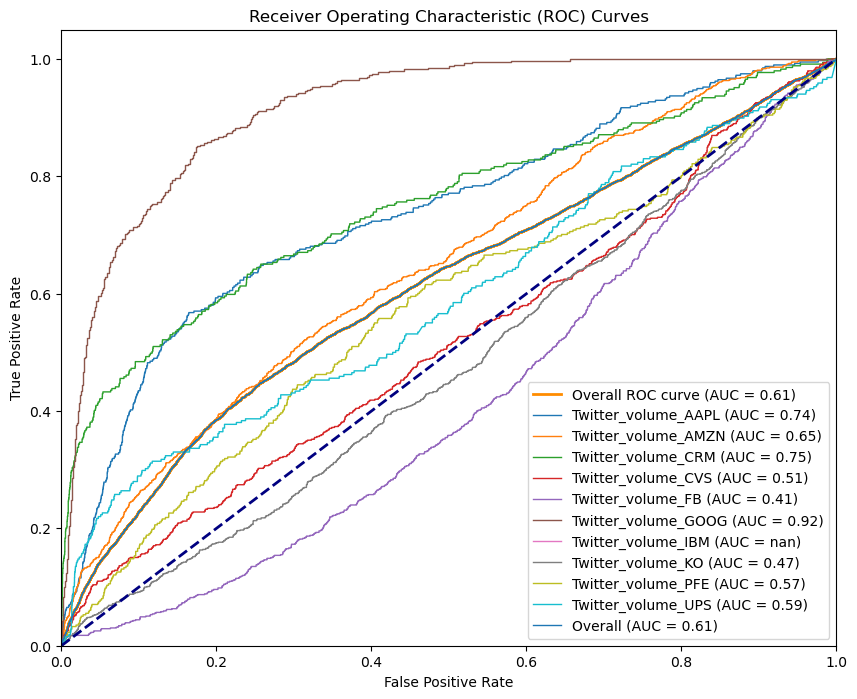

Processing directory: Twitter_volume_AAPL
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 35.64it/s]

IQR outliers classification report for Twitter_volume_AAPL
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      5602
         1.0       0.15      0.65      0.25       398

    accuracy                           0.74      6000
   macro avg       0.56      0.69      0.54      6000
weighted avg       0.91      0.74      0.80      6000

ROC AUC: 0.7355

Processing directory: Twitter_volume_AMZN
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 33.58it/s]

IQR outliers classification report for Twitter_volume_AMZN
              precision    recall  f1-score   support

         0.0       0.91      0.49      0.64      5208
         1.0       0.17      0.68      0.27       792

    accuracy                           0.52      6000
   macro avg       0.54      0.58      0.45      6000
weighted avg       0.81      0.52      0.59      6000

ROC AUC: 0.6455

Processing directory: Twitter_volume_CRM
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 51.49it/s]

IQR outliers classification report for Twitter_volume_CRM
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      5651
         1.0       0.27      0.44      0.34       349

    accuracy                           0.90      6000
   macro avg       0.62      0.68      0.64      6000
weighted avg       0.92      0.90      0.91      6000

ROC AUC: 0.7483

Processing directory: Twitter_volume_CVS
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.72it/s]

IQR outliers classification report for Twitter_volume_CVS
              precision    recall  f1-score   support

         0.0       0.91      0.16      0.27      5355
         1.0       0.11      0.86      0.20       645

    accuracy                           0.24      6000
   macro avg       0.51      0.51      0.23      6000
weighted avg       0.82      0.24      0.27      6000

ROC AUC: 0.5144

Processing directory: Twitter_volume_FB
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.48it/s]

IQR outliers classification report for Twitter_volume_FB
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80      5208
         1.0       0.07      0.13      0.09       792

    accuracy                           0.68      6000
   macro avg       0.46      0.44      0.45      6000
weighted avg       0.75      0.68      0.71      6000

ROC AUC: 0.4144

Processing directory: Twitter_volume_GOOG
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 48.63it/s]

IQR outliers classification report for Twitter_volume_GOOG

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      5602
         1.0       0.25      0.85      0.39       398

    accuracy                           0.82      6000
   macro avg       0.62      0.84      0.64      6000
weighted avg       0.94      0.82      0.86      6000

ROC AUC: 0.9162

Processing directory: Twitter_volume_IBM
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.92it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

IQR outliers classification report for Twitter_volume_IBM
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      6000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92      6000
   macro avg       0.50      0.46      0.48      6000
weighted avg       1.00      0.92      0.96      6000

ROC AUC: nan

Processing directory: Twitter_volume_KO
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.68it/s]

IQR outliers classification report for Twitter_volume_KO
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      4940
         1.0       0.16      0.15      0.15      1060

    accuracy                           0.71      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.70      0.71      0.71      6000

ROC AUC: 0.4741

Processing directory: Twitter_volume_PFE
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.92it/s]

IQR outliers classification report for Twitter_volume_PFE

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      5602
         1.0       0.11      0.20      0.14       398

    accuracy                           0.83      6000
   macro avg       0.52      0.54      0.52      6000
weighted avg       0.88      0.83      0.86      6000

ROC AUC: 0.5659

Processing directory: Twitter_volume_UPS
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.32it/s]

IQR outliers classification report for Twitter_volume_UPS
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      5682
         1.0       0.15      0.27      0.19       318

    accuracy                           0.88      6000
   macro avg       0.55      0.59      0.56      6000
weighted avg       0.91      0.88      0.89      6000

ROC AUC: 0.5889

Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83     54850
         1.0       0.14      0.44      0.21      5150

    accuracy                           0.72     60000
   macro avg       0.54      0.59      0.52     60000
weighted avg       0.87      0.72      0.78     60000


# NAB dataset - One by one 


Processing directory: Twitter_volume_AAPL


Training:   5%|▌         | 1/20 [00:01<00:31,  1.66s/it]

Epoch 1/20, Loss: 34913.7458


Training:  10%|█         | 2/20 [00:03<00:29,  1.66s/it]

Epoch 2/20, Loss: 27708.6527


Training:  15%|█▌        | 3/20 [00:04<00:28,  1.66s/it]

Epoch 3/20, Loss: 28870.3321


Training:  20%|██        | 4/20 [00:06<00:26,  1.66s/it]

Epoch 4/20, Loss: 27807.3051


Training:  25%|██▌       | 5/20 [00:08<00:24,  1.66s/it]

Epoch 5/20, Loss: 23117.9303


Training:  30%|███       | 6/20 [00:09<00:23,  1.66s/it]

Epoch 6/20, Loss: 22754.9497


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.66s/it]

Epoch 7/20, Loss: 27633.5610


Training:  40%|████      | 8/20 [00:13<00:19,  1.66s/it]

Epoch 8/20, Loss: 22453.4392


Training:  45%|████▌     | 9/20 [00:14<00:18,  1.65s/it]

Epoch 9/20, Loss: 28594.3008


Training:  50%|█████     | 10/20 [00:16<00:16,  1.65s/it]

Epoch 10/20, Loss: 26560.8533


Training:  55%|█████▌    | 11/20 [00:18<00:14,  1.65s/it]

Epoch 11/20, Loss: 24102.4870


Training:  60%|██████    | 12/20 [00:19<00:13,  1.65s/it]

Epoch 12/20, Loss: 25461.1337


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.64s/it]

Epoch 13/20, Loss: 27417.7148


Training:  70%|███████   | 14/20 [00:23<00:09,  1.64s/it]

Epoch 14/20, Loss: 23685.1702


Training:  75%|███████▌  | 15/20 [00:24<00:08,  1.64s/it]

Epoch 15/20, Loss: 33932.3446


Training:  80%|████████  | 16/20 [00:26<00:06,  1.64s/it]

Epoch 16/20, Loss: 25523.4840


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.64s/it]

Epoch 17/20, Loss: 21920.3416


Training:  90%|█████████ | 18/20 [00:29<00:03,  1.65s/it]

Epoch 18/20, Loss: 22816.1296


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.65s/it]

Epoch 19/20, Loss: 19965.5032


Training: 100%|██████████| 20/20 [00:33<00:00,  1.65s/it]


Epoch 20/20, Loss: 24441.8731


Testing: 100%|██████████| 3/3 [00:00<00:00, 71.39it/s]



Classification report for Twitter_volume_AAPL
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      7102
         1.0       0.20      0.29      0.23       398

    accuracy                           0.90      7500
   macro avg       0.58      0.61      0.59      7500
weighted avg       0.92      0.90      0.91      7500

ROC AUC: 0.6945

Processing directory: Twitter_volume_AMZN


Training:   5%|▌         | 1/20 [00:01<00:33,  1.75s/it]

Epoch 1/20, Loss: 2580.8053


Training:  10%|█         | 2/20 [00:03<00:30,  1.69s/it]

Epoch 2/20, Loss: 2325.0324


Training:  15%|█▌        | 3/20 [00:05<00:28,  1.67s/it]

Epoch 3/20, Loss: 2124.1062


Training:  20%|██        | 4/20 [00:06<00:26,  1.67s/it]

Epoch 4/20, Loss: 1745.5785


Training:  25%|██▌       | 5/20 [00:08<00:25,  1.67s/it]

Epoch 5/20, Loss: 1745.3858


Training:  30%|███       | 6/20 [00:10<00:23,  1.66s/it]

Epoch 6/20, Loss: 1599.2172


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.66s/it]

Epoch 7/20, Loss: 1178.4617


Training:  40%|████      | 8/20 [00:13<00:20,  1.68s/it]

Epoch 8/20, Loss: 956.5573


Training:  45%|████▌     | 9/20 [00:15<00:19,  1.73s/it]

Epoch 9/20, Loss: 968.6096


Training:  50%|█████     | 10/20 [00:16<00:17,  1.71s/it]

Epoch 10/20, Loss: 1187.1182


Training:  55%|█████▌    | 11/20 [00:18<00:15,  1.69s/it]

Epoch 11/20, Loss: 773.6096


Training:  60%|██████    | 12/20 [00:20<00:13,  1.68s/it]

Epoch 12/20, Loss: 759.4875


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.67s/it]

Epoch 13/20, Loss: 1032.6569


Training:  70%|███████   | 14/20 [00:23<00:10,  1.67s/it]

Epoch 14/20, Loss: 815.6381


Training:  75%|███████▌  | 15/20 [00:25<00:08,  1.66s/it]

Epoch 15/20, Loss: 721.5993


Training:  80%|████████  | 16/20 [00:26<00:06,  1.66s/it]

Epoch 16/20, Loss: 812.1852


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.66s/it]

Epoch 17/20, Loss: 912.7244


Training:  90%|█████████ | 18/20 [00:30<00:03,  1.66s/it]

Epoch 18/20, Loss: 1132.7115


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.66s/it]

Epoch 19/20, Loss: 669.8373


Training: 100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


Epoch 20/20, Loss: 604.9775


Testing: 100%|██████████| 3/3 [00:00<00:00, 71.96it/s]



Classification report for Twitter_volume_AMZN
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      6708
         1.0       0.32      0.21      0.25       792

    accuracy                           0.87      7500
   macro avg       0.61      0.58      0.59      7500
weighted avg       0.85      0.87      0.86      7500

ROC AUC: 0.6034

Processing directory: Twitter_volume_CRM


Training:   5%|▌         | 1/20 [00:01<00:34,  1.84s/it]

Epoch 1/20, Loss: 36.8570


Training:  10%|█         | 2/20 [00:03<00:31,  1.72s/it]

Epoch 2/20, Loss: 35.8445


Training:  15%|█▌        | 3/20 [00:05<00:28,  1.69s/it]

Epoch 3/20, Loss: 15.9844


Training:  20%|██        | 4/20 [00:06<00:26,  1.67s/it]

Epoch 4/20, Loss: 16.3333


Training:  25%|██▌       | 5/20 [00:08<00:24,  1.66s/it]

Epoch 5/20, Loss: 16.7619


Training:  30%|███       | 6/20 [00:10<00:23,  1.65s/it]

Epoch 6/20, Loss: 13.9896


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.65s/it]

Epoch 7/20, Loss: 13.2733


Training:  40%|████      | 8/20 [00:13<00:19,  1.65s/it]

Epoch 8/20, Loss: 14.9137


Training:  45%|████▌     | 9/20 [00:14<00:18,  1.65s/it]

Epoch 9/20, Loss: 16.3445


Training:  50%|█████     | 10/20 [00:16<00:16,  1.65s/it]

Epoch 10/20, Loss: 18.0710


Training:  55%|█████▌    | 11/20 [00:18<00:14,  1.64s/it]

Epoch 11/20, Loss: 14.5560


Training:  60%|██████    | 12/20 [00:19<00:13,  1.64s/it]

Epoch 12/20, Loss: 14.2736


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.64s/it]

Epoch 13/20, Loss: 16.0977


Training:  70%|███████   | 14/20 [00:23<00:09,  1.64s/it]

Epoch 14/20, Loss: 16.1420


Training:  75%|███████▌  | 15/20 [00:24<00:08,  1.64s/it]

Epoch 15/20, Loss: 14.6998


Training:  80%|████████  | 16/20 [00:26<00:06,  1.64s/it]

Epoch 16/20, Loss: 12.3735


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.64s/it]

Epoch 17/20, Loss: 13.4415


Training:  90%|█████████ | 18/20 [00:29<00:03,  1.64s/it]

Epoch 18/20, Loss: 15.6153


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.64s/it]

Epoch 19/20, Loss: 15.7405


Training: 100%|██████████| 20/20 [00:33<00:00,  1.65s/it]


Epoch 20/20, Loss: 16.6477


Testing: 100%|██████████| 3/3 [00:00<00:00, 91.54it/s]



Classification report for Twitter_volume_CRM
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      7151
         1.0       0.24      0.52      0.33       349

    accuracy                           0.90      7500
   macro avg       0.61      0.72      0.64      7500
weighted avg       0.94      0.90      0.92      7500

ROC AUC: 0.7876

Processing directory: Twitter_volume_CVS


Training:   5%|▌         | 1/20 [00:01<00:32,  1.70s/it]

Epoch 1/20, Loss: 0.8977


Training:  10%|█         | 2/20 [00:03<00:29,  1.66s/it]

Epoch 2/20, Loss: 0.8108


Training:  15%|█▌        | 3/20 [00:04<00:28,  1.65s/it]

Epoch 3/20, Loss: 0.7048


Training:  20%|██        | 4/20 [00:06<00:26,  1.65s/it]

Epoch 4/20, Loss: 0.7313


Training:  25%|██▌       | 5/20 [00:08<00:24,  1.65s/it]

Epoch 5/20, Loss: 0.7307


Training:  30%|███       | 6/20 [00:09<00:23,  1.65s/it]

Epoch 6/20, Loss: 0.7387


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.65s/it]

Epoch 7/20, Loss: 0.7458


Training:  40%|████      | 8/20 [00:13<00:19,  1.65s/it]

Epoch 8/20, Loss: 0.7376


Training:  45%|████▌     | 9/20 [00:14<00:18,  1.67s/it]

Epoch 9/20, Loss: 0.6563


Training:  50%|█████     | 10/20 [00:16<00:16,  1.68s/it]

Epoch 10/20, Loss: 0.6020


Training:  55%|█████▌    | 11/20 [00:18<00:15,  1.67s/it]

Epoch 11/20, Loss: 0.6622


Training:  60%|██████    | 12/20 [00:19<00:13,  1.67s/it]

Epoch 12/20, Loss: 0.7527


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.66s/it]

Epoch 13/20, Loss: 0.6542


Training:  70%|███████   | 14/20 [00:23<00:09,  1.66s/it]

Epoch 14/20, Loss: 0.6056


Training:  75%|███████▌  | 15/20 [00:24<00:08,  1.65s/it]

Epoch 15/20, Loss: 0.6628


Training:  80%|████████  | 16/20 [00:26<00:06,  1.65s/it]

Epoch 16/20, Loss: 0.6544


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.65s/it]

Epoch 17/20, Loss: 0.6586


Training:  90%|█████████ | 18/20 [00:29<00:03,  1.65s/it]

Epoch 18/20, Loss: 0.7372


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.65s/it]

Epoch 19/20, Loss: 0.7554


Training: 100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 20/20, Loss: 0.6795


Testing: 100%|██████████| 3/3 [00:00<00:00, 71.78it/s]



Classification report for Twitter_volume_CVS
              precision    recall  f1-score   support

         0.0       0.93      0.63      0.75      6855
         1.0       0.10      0.46      0.17       645

    accuracy                           0.62      7500
   macro avg       0.51      0.54      0.46      7500
weighted avg       0.85      0.62      0.70      7500

ROC AUC: 0.5478

Processing directory: Twitter_volume_FB


Training:   5%|▌         | 1/20 [00:01<00:34,  1.81s/it]

Epoch 1/20, Loss: 311.5106


Training:  10%|█         | 2/20 [00:03<00:31,  1.72s/it]

Epoch 2/20, Loss: 217.9646


Training:  15%|█▌        | 3/20 [00:05<00:28,  1.69s/it]

Epoch 3/20, Loss: 195.0822


Training:  20%|██        | 4/20 [00:06<00:26,  1.68s/it]

Epoch 4/20, Loss: 183.2968


Training:  25%|██▌       | 5/20 [00:08<00:24,  1.67s/it]

Epoch 5/20, Loss: 149.3029


Training:  30%|███       | 6/20 [00:10<00:23,  1.66s/it]

Epoch 6/20, Loss: 150.5841


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.66s/it]

Epoch 7/20, Loss: 171.1568


Training:  40%|████      | 8/20 [00:13<00:19,  1.65s/it]

Epoch 8/20, Loss: 155.6291


Training:  45%|████▌     | 9/20 [00:15<00:18,  1.65s/it]

Epoch 9/20, Loss: 160.6818


Training:  50%|█████     | 10/20 [00:16<00:16,  1.65s/it]

Epoch 10/20, Loss: 123.8700


Training:  55%|█████▌    | 11/20 [00:18<00:14,  1.65s/it]

Epoch 11/20, Loss: 128.3633


Training:  60%|██████    | 12/20 [00:19<00:13,  1.65s/it]

Epoch 12/20, Loss: 152.8939


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.65s/it]

Epoch 13/20, Loss: 155.1263


Training:  70%|███████   | 14/20 [00:23<00:09,  1.65s/it]

Epoch 14/20, Loss: 127.3883


Training:  75%|███████▌  | 15/20 [00:24<00:08,  1.65s/it]

Epoch 15/20, Loss: 109.0102


Training:  80%|████████  | 16/20 [00:26<00:06,  1.65s/it]

Epoch 16/20, Loss: 123.6116


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.65s/it]

Epoch 17/20, Loss: 129.7880


Training:  90%|█████████ | 18/20 [00:29<00:03,  1.65s/it]

Epoch 18/20, Loss: 117.3944


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.64s/it]

Epoch 19/20, Loss: 129.2482


Training: 100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 20/20, Loss: 118.6180


Testing: 100%|██████████| 3/3 [00:00<00:00, 71.84it/s]



Classification report for Twitter_volume_FB
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      6708
         1.0       0.08      0.06      0.07       792

    accuracy                           0.82      7500
   macro avg       0.48      0.49      0.48      7500
weighted avg       0.81      0.82      0.81      7500

ROC AUC: 0.4946

Processing directory: Twitter_volume_GOOG


Training:   5%|▌         | 1/20 [00:01<00:32,  1.69s/it]

Epoch 1/20, Loss: 496.0564


Training:  10%|█         | 2/20 [00:03<00:29,  1.67s/it]

Epoch 2/20, Loss: 319.3005


Training:  15%|█▌        | 3/20 [00:04<00:28,  1.66s/it]

Epoch 3/20, Loss: 232.5191


Training:  20%|██        | 4/20 [00:06<00:26,  1.65s/it]

Epoch 4/20, Loss: 220.6352


Training:  25%|██▌       | 5/20 [00:08<00:25,  1.69s/it]

Epoch 5/20, Loss: 215.1379


Training:  30%|███       | 6/20 [00:10<00:23,  1.68s/it]

Epoch 6/20, Loss: 214.3803


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.67s/it]

Epoch 7/20, Loss: 209.6723


Training:  40%|████      | 8/20 [00:13<00:19,  1.67s/it]

Epoch 8/20, Loss: 215.6998


Training:  45%|████▌     | 9/20 [00:15<00:18,  1.66s/it]

Epoch 9/20, Loss: 248.4110


Training:  50%|█████     | 10/20 [00:16<00:16,  1.66s/it]

Epoch 10/20, Loss: 184.4302


Training:  55%|█████▌    | 11/20 [00:18<00:14,  1.65s/it]

Epoch 11/20, Loss: 190.6440


Training:  60%|██████    | 12/20 [00:19<00:13,  1.65s/it]

Epoch 12/20, Loss: 198.7151


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.66s/it]

Epoch 13/20, Loss: 175.8433


Training:  70%|███████   | 14/20 [00:23<00:09,  1.66s/it]

Epoch 14/20, Loss: 196.6551


Training:  75%|███████▌  | 15/20 [00:24<00:08,  1.65s/it]

Epoch 15/20, Loss: 154.2454


Training:  80%|████████  | 16/20 [00:26<00:06,  1.65s/it]

Epoch 16/20, Loss: 185.4737


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.65s/it]

Epoch 17/20, Loss: 214.8790


Training:  90%|█████████ | 18/20 [00:29<00:03,  1.65s/it]

Epoch 18/20, Loss: 172.9921


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.65s/it]

Epoch 19/20, Loss: 172.2383


Training: 100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 20/20, Loss: 181.2534


Testing: 100%|██████████| 3/3 [00:00<00:00, 70.88it/s]



Classification report for Twitter_volume_GOOG
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      7102
         1.0       0.20      0.57      0.30       398

    accuracy                           0.86      7500
   macro avg       0.59      0.72      0.61      7500
weighted avg       0.93      0.86      0.89      7500

ROC AUC: 0.7666

Processing directory: Twitter_volume_IBM


Training:   5%|▌         | 1/20 [00:01<00:33,  1.77s/it]

Epoch 1/20, Loss: 19.0062


Training:  10%|█         | 2/20 [00:03<00:30,  1.70s/it]

Epoch 2/20, Loss: 12.0442


Training:  15%|█▌        | 3/20 [00:05<00:28,  1.69s/it]

Epoch 3/20, Loss: 12.0510


Training:  20%|██        | 4/20 [00:06<00:26,  1.67s/it]

Epoch 4/20, Loss: 10.9999


Training:  25%|██▌       | 5/20 [00:08<00:25,  1.69s/it]

Epoch 5/20, Loss: 12.1463


Training:  30%|███       | 6/20 [00:10<00:23,  1.68s/it]

Epoch 6/20, Loss: 11.5788


Training:  35%|███▌      | 7/20 [00:12<00:22,  1.75s/it]

Epoch 7/20, Loss: 11.0796


Training:  40%|████      | 8/20 [00:13<00:20,  1.73s/it]

Epoch 8/20, Loss: 9.9394


Training:  45%|████▌     | 9/20 [00:15<00:18,  1.71s/it]

Epoch 9/20, Loss: 11.7825


Training:  50%|█████     | 10/20 [00:17<00:18,  1.81s/it]

Epoch 10/20, Loss: 11.1508


Training:  55%|█████▌    | 11/20 [00:19<00:15,  1.76s/it]

Epoch 11/20, Loss: 9.1819


Training:  60%|██████    | 12/20 [00:20<00:13,  1.72s/it]

Epoch 12/20, Loss: 11.1887


Training:  65%|██████▌   | 13/20 [00:22<00:11,  1.70s/it]

Epoch 13/20, Loss: 10.2454


Training:  70%|███████   | 14/20 [00:23<00:10,  1.68s/it]

Epoch 14/20, Loss: 9.4452


Training:  75%|███████▌  | 15/20 [00:25<00:08,  1.68s/it]

Epoch 15/20, Loss: 8.9847


Training:  80%|████████  | 16/20 [00:27<00:06,  1.67s/it]

Epoch 16/20, Loss: 10.6550


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.66s/it]

Epoch 17/20, Loss: 9.8748


Training:  90%|█████████ | 18/20 [00:30<00:03,  1.66s/it]

Epoch 18/20, Loss: 9.1832


Training:  95%|█████████▌| 19/20 [00:32<00:01,  1.65s/it]

Epoch 19/20, Loss: 10.5153


Training: 100%|██████████| 20/20 [00:33<00:00,  1.69s/it]


Epoch 20/20, Loss: 10.1284


Testing: 100%|██████████| 3/3 [00:00<00:00, 89.96it/s]



Classification report for Twitter_volume_IBM
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      6902
         1.0       0.15      0.16      0.15       598

    accuracy                           0.86      7500
   macro avg       0.54      0.54      0.54      7500
weighted avg       0.87      0.86      0.86      7500

ROC AUC: 0.5445

Processing directory: Twitter_volume_KO


Training:   5%|▌         | 1/20 [00:01<00:32,  1.70s/it]

Epoch 1/20, Loss: 229.8822


Training:  10%|█         | 2/20 [00:03<00:29,  1.67s/it]

Epoch 2/20, Loss: 158.5303


Training:  15%|█▌        | 3/20 [00:04<00:28,  1.65s/it]

Epoch 3/20, Loss: 125.4507


Training:  20%|██        | 4/20 [00:06<00:26,  1.65s/it]

Epoch 4/20, Loss: 132.7642


Training:  25%|██▌       | 5/20 [00:08<00:24,  1.65s/it]

Epoch 5/20, Loss: 162.7041


Training:  30%|███       | 6/20 [00:09<00:23,  1.65s/it]

Epoch 6/20, Loss: 123.7651


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.65s/it]

Epoch 7/20, Loss: 132.7437


Training:  40%|████      | 8/20 [00:13<00:19,  1.65s/it]

Epoch 8/20, Loss: 122.1321


Training:  45%|████▌     | 9/20 [00:14<00:18,  1.65s/it]

Epoch 9/20, Loss: 126.9429


Training:  50%|█████     | 10/20 [00:16<00:16,  1.65s/it]

Epoch 10/20, Loss: 117.0601


Training:  55%|█████▌    | 11/20 [00:18<00:15,  1.71s/it]

Epoch 11/20, Loss: 133.9501


Training:  60%|██████    | 12/20 [00:19<00:13,  1.68s/it]

Epoch 12/20, Loss: 119.0138


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.66s/it]

Epoch 13/20, Loss: 120.6575


Training:  70%|███████   | 14/20 [00:23<00:09,  1.65s/it]

Epoch 14/20, Loss: 103.9272


Training:  75%|███████▌  | 15/20 [00:24<00:08,  1.65s/it]

Epoch 15/20, Loss: 145.1473


Training:  80%|████████  | 16/20 [00:26<00:06,  1.65s/it]

Epoch 16/20, Loss: 120.1776


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.65s/it]

Epoch 17/20, Loss: 129.0510


Training:  90%|█████████ | 18/20 [00:29<00:03,  1.65s/it]

Epoch 18/20, Loss: 120.8753


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.65s/it]

Epoch 19/20, Loss: 109.0562


Training: 100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 20/20, Loss: 102.1105


Testing: 100%|██████████| 3/3 [00:00<00:00, 90.90it/s]



Classification report for Twitter_volume_KO
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      6440
         1.0       0.13      0.09      0.10      1060

    accuracy                           0.79      7500
   macro avg       0.49      0.50      0.49      7500
weighted avg       0.75      0.79      0.77      7500

ROC AUC: 0.4647

Processing directory: Twitter_volume_PFE


Training:   5%|▌         | 1/20 [00:01<00:35,  1.88s/it]

Epoch 1/20, Loss: 2.0725


Training:  10%|█         | 2/20 [00:03<00:31,  1.74s/it]

Epoch 2/20, Loss: 1.8692


Training:  15%|█▌        | 3/20 [00:05<00:29,  1.71s/it]

Epoch 3/20, Loss: 1.8427


Training:  20%|██        | 4/20 [00:06<00:26,  1.68s/it]

Epoch 4/20, Loss: 1.8856


Training:  25%|██▌       | 5/20 [00:08<00:25,  1.67s/it]

Epoch 5/20, Loss: 1.7840


Training:  30%|███       | 6/20 [00:10<00:23,  1.66s/it]

Epoch 6/20, Loss: 1.6694


Training:  35%|███▌      | 7/20 [00:11<00:21,  1.65s/it]

Epoch 7/20, Loss: 1.6453


Training:  40%|████      | 8/20 [00:13<00:19,  1.66s/it]

Epoch 8/20, Loss: 1.8366


Training:  45%|████▌     | 9/20 [00:15<00:18,  1.66s/it]

Epoch 9/20, Loss: 1.7298


Training:  50%|█████     | 10/20 [00:16<00:16,  1.66s/it]

Epoch 10/20, Loss: 1.6154


Training:  55%|█████▌    | 11/20 [00:18<00:14,  1.65s/it]

Epoch 11/20, Loss: 1.6859


Training:  60%|██████    | 12/20 [00:20<00:13,  1.65s/it]

Epoch 12/20, Loss: 1.5893


Training:  65%|██████▌   | 13/20 [00:21<00:11,  1.65s/it]

Epoch 13/20, Loss: 1.4309


Training:  70%|███████   | 14/20 [00:23<00:09,  1.64s/it]

Epoch 14/20, Loss: 1.7730


Training:  75%|███████▌  | 15/20 [00:24<00:08,  1.66s/it]

Epoch 15/20, Loss: 1.7172


Training:  80%|████████  | 16/20 [00:26<00:06,  1.65s/it]

Epoch 16/20, Loss: 1.7236


Training:  85%|████████▌ | 17/20 [00:28<00:04,  1.65s/it]

Epoch 17/20, Loss: 1.5597


Training:  90%|█████████ | 18/20 [00:29<00:03,  1.65s/it]

Epoch 18/20, Loss: 1.4478


Training:  95%|█████████▌| 19/20 [00:31<00:01,  1.65s/it]

Epoch 19/20, Loss: 1.6015


Training: 100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 20/20, Loss: 1.5405


Testing: 100%|██████████| 3/3 [00:00<00:00, 89.34it/s]



Classification report for Twitter_volume_PFE
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      7102
         1.0       0.09      0.16      0.12       398

    accuracy                           0.87      7500
   macro avg       0.52      0.54      0.52      7500
weighted avg       0.91      0.87      0.89      7500

ROC AUC: 0.5382

Processing directory: Twitter_volume_UPS


Training:   5%|▌         | 1/20 [00:01<00:32,  1.69s/it]

Epoch 1/20, Loss: 809.3784


Training:  10%|█         | 2/20 [00:03<00:33,  1.88s/it]

Epoch 2/20, Loss: 492.4767


Training:  15%|█▌        | 3/20 [00:05<00:30,  1.77s/it]

Epoch 3/20, Loss: 395.4700


Training:  20%|██        | 4/20 [00:06<00:27,  1.72s/it]

Epoch 4/20, Loss: 385.4372


Training:  25%|██▌       | 5/20 [00:08<00:25,  1.70s/it]

Epoch 5/20, Loss: 379.8799


Training:  30%|███       | 6/20 [00:10<00:23,  1.69s/it]

Epoch 6/20, Loss: 377.0861


Training:  35%|███▌      | 7/20 [00:12<00:22,  1.73s/it]

Epoch 7/20, Loss: 307.5502


Training:  40%|████      | 8/20 [00:13<00:21,  1.77s/it]

Epoch 8/20, Loss: 287.4060


Training:  45%|████▌     | 9/20 [00:15<00:19,  1.73s/it]

Epoch 9/20, Loss: 349.4315


Training:  50%|█████     | 10/20 [00:17<00:18,  1.89s/it]

Epoch 10/20, Loss: 282.2443


Training:  55%|█████▌    | 11/20 [00:19<00:16,  1.83s/it]

Epoch 11/20, Loss: 214.4615


Training:  60%|██████    | 12/20 [00:21<00:14,  1.80s/it]

Epoch 12/20, Loss: 288.5648


Training:  65%|██████▌   | 13/20 [00:22<00:12,  1.77s/it]

Epoch 13/20, Loss: 177.8190


Training:  70%|███████   | 14/20 [00:24<00:10,  1.74s/it]

Epoch 14/20, Loss: 209.5704


Training:  75%|███████▌  | 15/20 [00:26<00:08,  1.71s/it]

Epoch 15/20, Loss: 156.9527


Training:  80%|████████  | 16/20 [00:27<00:06,  1.69s/it]

Epoch 16/20, Loss: 222.2168


Training:  85%|████████▌ | 17/20 [00:30<00:05,  1.82s/it]

Epoch 17/20, Loss: 151.1269


Training:  90%|█████████ | 18/20 [00:31<00:03,  1.77s/it]

Epoch 18/20, Loss: 152.4016


Training:  95%|█████████▌| 19/20 [00:33<00:01,  1.74s/it]

Epoch 19/20, Loss: 183.7443


Training: 100%|██████████| 20/20 [00:35<00:00,  1.75s/it]


Epoch 20/20, Loss: 161.0926


Testing: 100%|██████████| 3/3 [00:00<00:00, 90.56it/s]


Classification report for Twitter_volume_UPS
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89      7182
         1.0       0.10      0.46      0.17       318

    accuracy                           0.81      7500
   macro avg       0.54      0.64      0.53      7500
weighted avg       0.94      0.81      0.86      7500

ROC AUC: 0.6001

Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90     69252
         1.0       0.14      0.25      0.18      5748

    accuracy                           0.83     75000
   macro avg       0.54      0.56      0.54     75000
weighted avg       0.87      0.83      0.85     75000




Overall ROC AUC: 0.5708


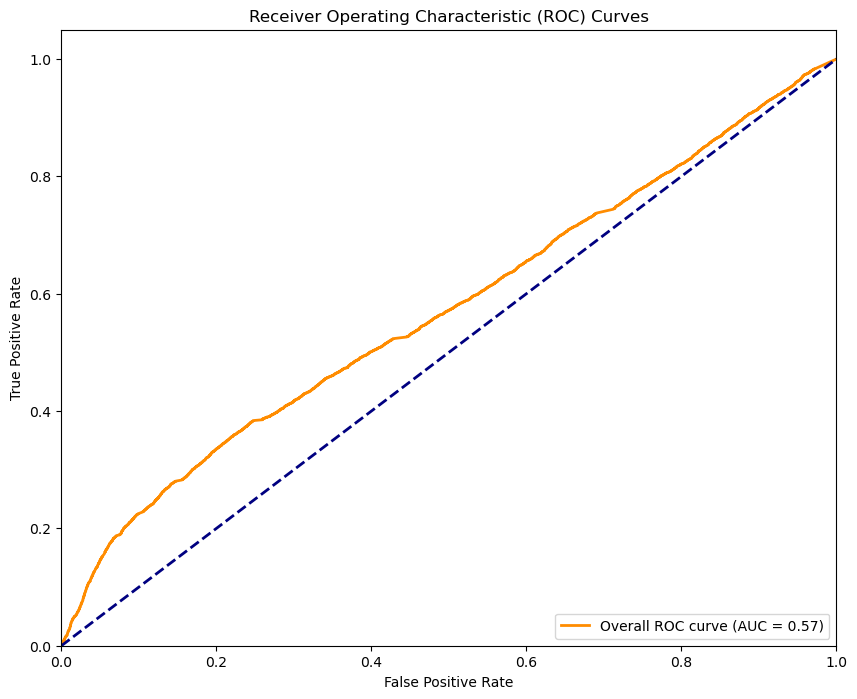

In [18]:
# Main execution
data_folder = "../datasets/UTS/NAB"
noise_scheduler = NoiseScheduler(
    num_timesteps=config.num_timesteps,
    beta_start=config.beta_start,
    beta_end=config.beta_end,
    beta_schedule=config.beta_schedule
)

all_dir_results = []

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
        result = process_directory(sequence_length, stride, input_size, data_path, base_config, TCN, noise_scheduler)
        all_dir_results.append(result)

# Compute and plot overall metrics
all_labels = np.concatenate([res['labels'] for res in all_dir_results])
all_scores = np.concatenate([res['scores'] for res in all_dir_results])

print("\nOverall IQR outliers classification report")
print(classification_report(all_labels, (np.array(all_scores) > 1.5).astype(int)))

fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

all_dir_results.append({
    'dir': 'Overall',
    'labels': all_labels,
    'scores': all_scores,
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
})

# Save results to CSV
results_df = pd.DataFrame(all_dir_results)
results_df.to_csv(os.path.join(config.output_dir, f"per_directory_roc_results_{config.num_epochs}.csv"))

# Plot ROC curves
plt.figure(figsize=(10, 8))
for res in all_dir_results:
    if res['dir'] == 'Overall':
        plt.plot(res['fpr'], res['tpr'], color='darkorange', lw=2, label=f"Overall (AUC = {res['roc_auc']:.2f})")
    else:
        plt.plot(res['fpr'], res['tpr'], lw=1, label=f"{res['dir']} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"one_by_one_roc_curves_{config.num_epochs}.png"))
plt.close()

print(f"\nOverall ROC AUC: {roc_auc:.4f}")

# plot ans save only the overall roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"one_by_oneoverall_roc_curve_{config.num_epochs}.png"))
plt.show()

In [19]:
# Extract AUC-ROC scores for the box plot
auc_scores = [res['roc_auc'] for res in all_dir_results if res['dir'] != 'Overall']

# Create the figure
plt.figure(figsize=(6, 8))  # Adjust the width to make it narrower

# Plot AUC-ROC box plot
sns.boxplot(y=auc_scores, color='lightpink', width=0.3)  # Reduced width for a narrower box

# Set the y-axis limits from 0 to 1
plt.ylim(0, 1)

# Customize the plot
plt.ylabel('AUC-ROC')
plt.title('Distribution of AUC-ROC Scores')

# Remove x-axis label and ticks
plt.xlabel('')
plt.xticks([])

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(config.output_dir, f"one_b_one_auc_roc_distribution_{config.num_epochs}.png"))
plt.close()

# Print summary statistics
print(f"\nAUC-ROC Score Distribution:")
print(f"Mean: {np.mean(auc_scores):.4f}")
print(f"Median: {np.median(auc_scores):.4f}")
print(f"Min: {np.min(auc_scores):.4f}")
print(f"Max: {np.max(auc_scores):.4f}")


AUC-ROC Score Distribution:
Mean: 0.6042
Median: 0.5739
Min: 0.4647
Max: 0.7876


# Yahoo - all in one 

In [5]:
# config 
base_config = {
  "data_path":  "../datasets/UTS/Yahoo1",
  "output_dir": "output/output_Yahoo1_gaussian1",
  "train_batch_size": 4,
  "eval_batch_size": 1,
  "num_epochs": 15,
  
  "learning_rate": 0.0001,
  "num_timesteps": 100,
  "beta_schedule": "linear",
  "embedding_size": 128,
  "hidden_size": 128,
  "hidden_layers": 3,
  "time_embedding": "sinusoidal",
  "input_embedding": "sinusoidal",
  "save_eval_step": 10,
  "experiment_name": "NonName",
  "beta_start": 0.001,
  "beta_end": 0.05,
  "save_model_epochs": 1
}

sequence_length = 300
input_size = 1  # Assuming 1D time series data
stride = 100

    
config = Config(base_config)

noise_scheduler = NoiseScheduler(
    num_timesteps=config.num_timesteps,
    beta_start=config.beta_start,
    beta_end=config.beta_end,
    beta_schedule=config.beta_schedule
)


data_folder= base_config['data_path']
print(data_folder)


../datasets/UTS/Yahoo1


In [ ]:
# all in one training and testing
import os

# Initialize the new TCN model
model = TCN(
    num_inputs=input_size,  # Number of input channels
    num_channels=[32, 64, 128,256 ,128,64,32,1],  # Number of channels in each residual block
    kernel_size=3,  # Size of the convolution kernel
    dilations=None,  # Dilation sizes
    dilation_reset=None,  # Reset dilation size
    dropout=0.2,  # Dropout rate
    causal=True,  # Causal convolutions for real-time applications
    use_norm='weight_norm',  # Normalization method
    activation='relu',  # Activation function
    kernel_initializer='xavier_uniform',  # Weight initializer
    use_skip_connections=False,  # Skip connections
    input_shape='NLC',  # Input shape format ('NCL' or 'NLC') [16, 5000, 1] for NLC
    embedding_shapes=None,  # Embedding shapes
    embedding_mode='add',  # Embedding mode ('add' or 'concat')
    use_gate=False,  # Use gated linear unit
    lookahead=0,  # Lookahead for future time steps
    output_projection=None,  # Output projection
    output_activation=None,  # Output activation
)

#================================================================================================
# train the model and test it

def trainer_all_in_one(sequence_length, stride,base_config, config, model, noise_scheduler,data_folder):
    
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
    )
    
    losses = []
    print("Training model...")
    # Training over windows: The code does train over these windows. Each batch contains multiple sequences of length sequence_length.
        
    for epoch in tqdm(range(config.num_epochs)):
        model.train()
        for root, dirs, files in os.walk(data_folder):
            for dir in dirs:
                data_path = os.path.join(data_folder, dir)
            
                # change datapath in the config
                base_config["data_path"] = data_path
                
                # Create Config object
                config = Config(base_config)
                
                # Set up dataset and dataloader
                dataset = TimeSeriesDataset(config.data_path,sequence_length=sequence_length, stride=stride,normalize=True)
                
                dataloader = DataLoader(dataset, batch_size=config.train_batch_size, shuffle=False , drop_last=True)
                
                for step, (batch, labels) in enumerate(dataloader):
                    
                    noise = torch.randn_like(batch)
                    
                    timesteps = torch.randint(
                        0, noise_scheduler.num_timesteps, (batch.shape[0],)
                    ).long()
                    
                    # order timesteps
                    timesteps = torch.sort(timesteps).values
                    
                    noisy = noise_scheduler.add_noise(batch, noise, timesteps)
                    
                    noisy = noisy.unsqueeze(-1) 
                    # pred noise from the model
                    noise_pred = model(noisy)
                    
                    #print("noise_pred", noise_pred.shape)
                    batch = batch.unsqueeze(-1)
                    
                    loss = F.mse_loss(noise_pred, batch) # je vais predire la distribution de base 
                    #loss =torch.nn.L1Loss(noise_pred, batch)
                    loss.backward()
                    nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                    optimizer.step()
                    optimizer.zero_grad()
                    
                if epoch == 0:    
                    plot_samples(batch[0], noisy[0], noise_pred[0])
                
                #progress_bar.update(1)
                logs = {"loss": loss.detach().item(), "epoch": epoch}
                losses.append(loss.detach().item())
                print(logs)
            break
        break

    # save the model and the losses and the config in the output directory by creating a new directory with the number of epochs and the all in one training
    output_dir = os.path.join(config.output_dir, str(config.num_epochs))
    os.makedirs(output_dir, exist_ok=True)
    
    """# save the model
    model_path = os.path.join(output_dir, "model.pth")
    torch.save(model.state_dict(), model_path)
    
    # save the losses and the config in a json file
    losses_path = os.path.join(output_dir, "losses.json")
    with open(losses_path, "w") as f:
        json.dump(losses, f)
        
    # save the config
    config_path = os.path.join(output_dir, "config.json")
    with open(config_path, "w") as f:
        json.dump(vars(config), f)"""
    
    
    #progress_bar.close()              
    return model, losses

model, losses = trainer_all_in_one(sequence_length, stride,base_config, config, model, noise_scheduler, data_folder)


100%|██████████| 2/2 [00:00<00:00, 159.53it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 108.33it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
100%|██████████| 2/2 [00:00<00:00, 110.62it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
100%|██████████| 2/2 [00:00<00:00, 112.61it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
100%|██████████| 2/2 [00:00<00:00, 112.08it/s]



Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     59647
         1.0       0.07      0.05      0.06       353

    accuracy                           0.99     60000
   macro avg       0.53      0.52      0.53     60000
weighted avg       0.99      0.99      0.99     60000



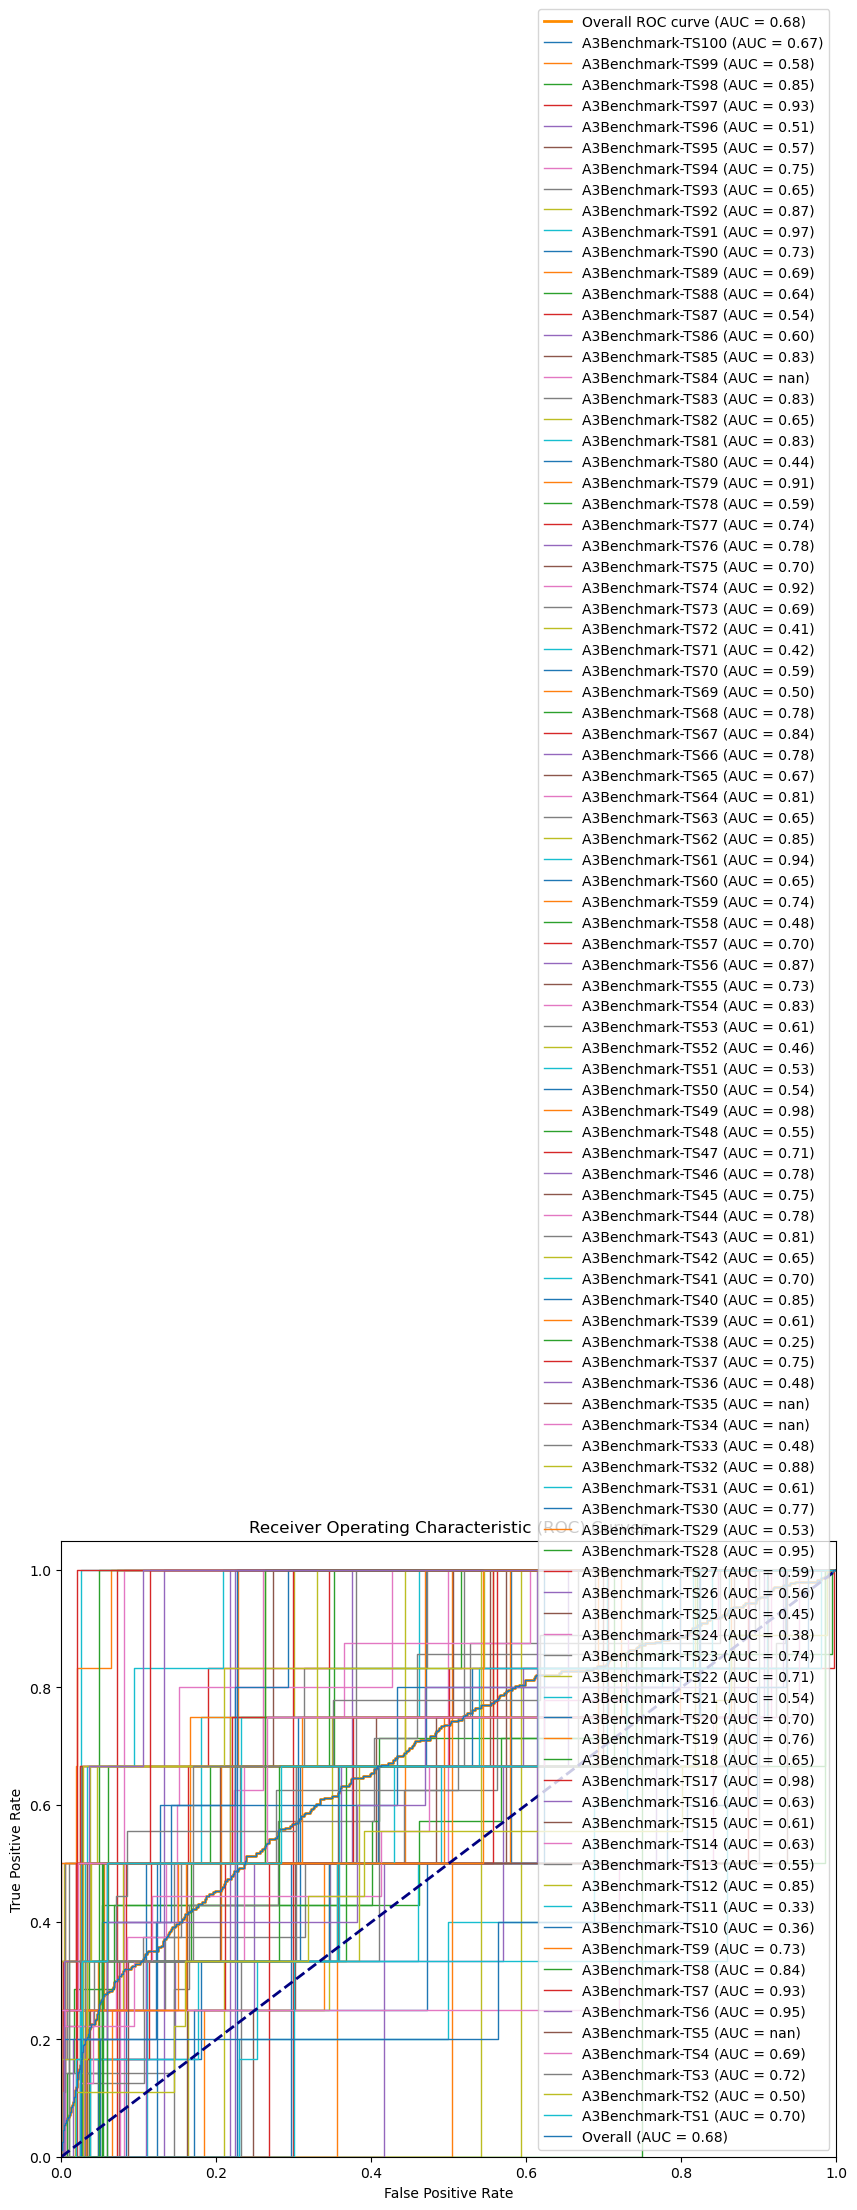


Overall ROC AUC: 0.6812


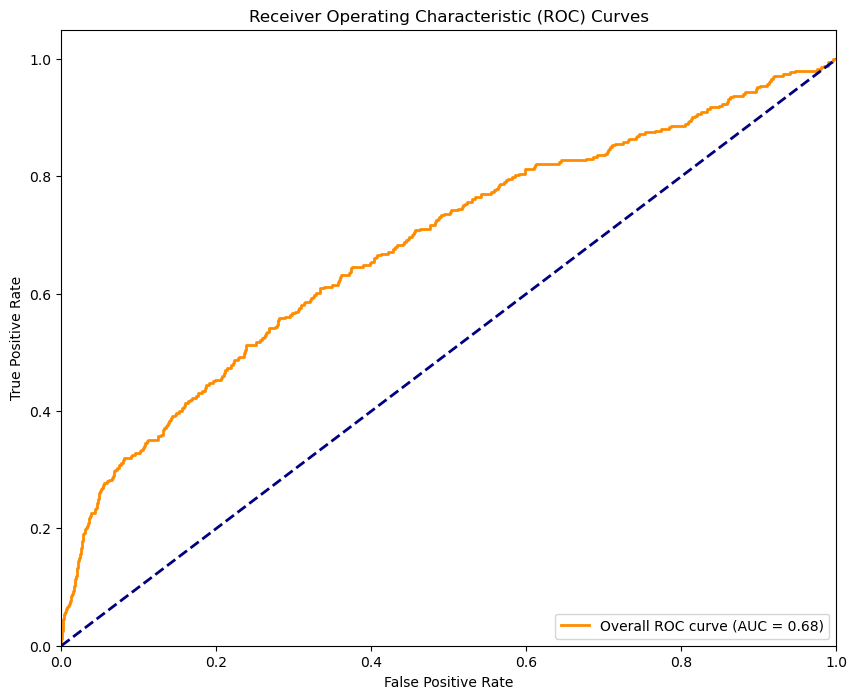

In [8]:
# evaluation with roc curve and classification report 
from sklearn.metrics import classification_report, roc_curve, auc

model.eval()
eval_batch_size = config.eval_batch_size

all_dir_results = []

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
        #print(f"\nProcessing directory: {dir}")
    
        # change datapath in the config
        base_config["data_path"] = data_path
        config = Config(base_config)
        
        # Set up dataset and dataloader for test data
        test_dataset = TimeSeriesTestDataset(config.data_path, sequence_length=sequence_length , stride=sequence_length , normalize=True)
        #print("Number of batches:", len(test_dataset))

        # Create dataloader for the test dataset
        test_dataloader = DataLoader(test_dataset, batch_size=config.eval_batch_size, shuffle=False, drop_last=True)

        all_labels = []
        all_scores = []

        for step, (sample, labels) in enumerate(tqdm(test_dataloader)):
            std_data = torch.std(sample)
            
            with torch.no_grad():
                timesteps = torch.tensor([20])
                
                noise = torch.randn_like(sample) 
                noisy_sample = noise_scheduler.add_noise(sample, noise, timesteps)
                
                noisy_sample = noisy_sample.unsqueeze(-1)
                sample = sample.unsqueeze(-1)
                denoised_sample = model(noisy_sample)

                # Calculate IQR outliers
                iqr_out, iqr_scores = z_score_outliers(sample, denoised_sample,3.5)
                
                labels = labels.cpu().numpy()

                # Store labels and scores
                all_labels.extend(labels.reshape(-1))
                all_scores.extend(iqr_scores.reshape(-1))

        # Calculate metrics for this directory
        fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
        roc_auc = auc(fpr, tpr)
        
        """print("\nIQR outliers classification report for", dir)
        print(classification_report(all_labels, (np.array(all_scores) > 1.5).astype(int)))
        print(f"ROC AUC: {roc_auc:.4f}")"""

        # Store results for this directory
        all_dir_results.append({
            'dir': dir,
            'labels': all_labels,
            'scores': all_scores,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        })

# Compute overall metrics
all_labels = np.concatenate([res['labels'] for res in all_dir_results])
all_scores = np.concatenate([res['scores'] for res in all_dir_results])

print("\nOverall IQR outliers classification report")
print(classification_report(all_labels, (np.array(all_scores) > 3 ).astype(int)))

"""for density_threshold in range(5 , 25, 2):
    print(f"\nDensity threshold: {density_threshold}")
    print(classification_report(all_labels, (np.array(all_scores) > density_threshold*0.1).astype(int)))"""

fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

all_dir_results.append({
    'dir': 'Overall',
    'labels': all_labels,
    'scores': all_scores,
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
})

#save the results in a csv file
results_df = pd.DataFrame(all_dir_results)
#results_df.to_csv(os.path.join(config.output_dir, f"allinone_roc_resultsf{config.num_epochs}.csv"))

# Plot overall ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')

# Plot ROC curves for each directory
for res in all_dir_results:
    plt.plot(res['fpr'], res['tpr'], lw=1, label=f"{res['dir']} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.savefig(os.path.join(config.output_dir, f"all_in_one_roc_curves_{config.num_epochs}.png"))
plt.legend(loc="lower right")
plt.show()


print(f"\nOverall ROC AUC: {roc_auc:.4f}")

# plot ans save only the overall roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"all_in_one_overall_roc_curve_{config.num_epochs}.png"))
plt.show()

In [56]:
# ROC AUC score distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming all_dir_results is already populated with results from each directory

# Extract AUC-ROC scores for the box plot
auc_scores = [res['roc_auc'] for res in all_dir_results if res['dir'] != 'Overall']

# Create the figure
plt.figure(figsize=(6, 8))  # Adjust the width to make it narrower

# Plot AUC-ROC box plot
sns.boxplot(y=auc_scores, color='lightpink', width=0.3)  # Reduced width for a narrower box

# Set the y-axis limits from 0 to 1
plt.ylim(0, 1)

# Customize the plot
plt.ylabel('AUC-ROC')
plt.title('Distribution of AUC-ROC Scores')

# Remove x-axis label and ticks
plt.xlabel('')
plt.xticks([])

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(config.output_dir, f"allin_one_auc_roc_distribution_{config.num_epochs}.png"))
plt.close()

# Print summary statistics
print(f"\nAUC-ROC Score Distribution:")
print(f"Mean: {np.mean(auc_scores):.4f}")
print(f"Median: {np.median(auc_scores):.4f}")
print(f"Min: {np.min(auc_scores):.4f}")
print(f"Max: {np.max(auc_scores):.4f}")


AUC-ROC Score Distribution:
Mean: nan
Median: nan
Min: nan
Max: nan


# Yahoo - one by one 

In [12]:

print("\nOverall IQR outliers classification report")
print(classification_report(all_labels, (np.array(all_scores) > 2.5).astype(int)))


Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.99      0.50      0.66     74563
         1.0       0.01      0.54      0.01       437

    accuracy                           0.50     75000
   macro avg       0.50      0.52      0.34     75000
weighted avg       0.99      0.50      0.66     75000



../datasets/UTS/Yahoo1

Processing directory: A3Benchmark-TS100


Testing: 100%|██████████| 5/5 [00:00<00:00, 228.37it/s]



Processing directory: A3Benchmark-TS99


Testing: 100%|██████████| 5/5 [00:00<00:00, 213.52it/s]



Processing directory: A3Benchmark-TS98


Testing: 100%|██████████| 5/5 [00:00<00:00, 312.56it/s]



Processing directory: A3Benchmark-TS97


Testing: 100%|██████████| 5/5 [00:00<00:00, 231.50it/s]



Processing directory: A3Benchmark-TS96


Testing: 100%|██████████| 5/5 [00:00<00:00, 312.75it/s]



Processing directory: A3Benchmark-TS95


Testing: 100%|██████████| 5/5 [00:00<00:00, 274.26it/s]



Processing directory: A3Benchmark-TS94


Testing: 100%|██████████| 5/5 [00:00<00:00, 319.43it/s]



Processing directory: A3Benchmark-TS93


Testing: 100%|██████████| 5/5 [00:00<00:00, 324.65it/s]



Processing directory: A3Benchmark-TS92


Testing: 100%|██████████| 5/5 [00:00<00:00, 187.45it/s]



Processing directory: A3Benchmark-TS91


Testing: 100%|██████████| 5/5 [00:00<00:00, 324.22it/s]



Processing directory: A3Benchmark-TS90


Testing: 100%|██████████| 5/5 [00:00<00:00, 298.94it/s]



Processing directory: A3Benchmark-TS89


Testing: 100%|██████████| 5/5 [00:00<00:00, 246.32it/s]



Processing directory: A3Benchmark-TS88


Testing: 100%|██████████| 5/5 [00:00<00:00, 209.79it/s]



Processing directory: A3Benchmark-TS87


Testing: 100%|██████████| 5/5 [00:00<00:00, 306.82it/s]



Processing directory: A3Benchmark-TS86


Testing: 100%|██████████| 5/5 [00:00<00:00, 311.05it/s]



Processing directory: A3Benchmark-TS85


Testing: 100%|██████████| 5/5 [00:00<00:00, 302.96it/s]



Processing directory: A3Benchmark-TS84


Testing: 100%|██████████| 5/5 [00:00<00:00, 319.34it/s]



Processing directory: A3Benchmark-TS83


Testing: 100%|██████████| 5/5 [00:00<00:00, 225.85it/s]



Processing directory: A3Benchmark-TS82


Testing: 100%|██████████| 5/5 [00:00<00:00, 326.14it/s]



Processing directory: A3Benchmark-TS81


Testing: 100%|██████████| 5/5 [00:00<00:00, 301.10it/s]



Processing directory: A3Benchmark-TS80


Testing: 100%|██████████| 5/5 [00:00<00:00, 237.29it/s]



Processing directory: A3Benchmark-TS79


Testing: 100%|██████████| 5/5 [00:00<00:00, 212.05it/s]



Processing directory: A3Benchmark-TS78


Testing: 100%|██████████| 5/5 [00:00<00:00, 300.20it/s]



Processing directory: A3Benchmark-TS77


Testing: 100%|██████████| 5/5 [00:00<00:00, 287.42it/s]



Processing directory: A3Benchmark-TS76


Testing: 100%|██████████| 5/5 [00:00<00:00, 224.28it/s]



Processing directory: A3Benchmark-TS75


Testing: 100%|██████████| 5/5 [00:00<00:00, 302.86it/s]



Processing directory: A3Benchmark-TS74


Testing: 100%|██████████| 5/5 [00:00<00:00, 188.37it/s]



Processing directory: A3Benchmark-TS73


Testing: 100%|██████████| 5/5 [00:00<00:00, 189.85it/s]



Processing directory: A3Benchmark-TS72


Testing: 100%|██████████| 5/5 [00:00<00:00, 301.57it/s]



Processing directory: A3Benchmark-TS71


Testing: 100%|██████████| 5/5 [00:00<00:00, 235.74it/s]



Processing directory: A3Benchmark-TS70


Testing: 100%|██████████| 5/5 [00:00<00:00, 265.86it/s]



Processing directory: A3Benchmark-TS69


Testing: 100%|██████████| 5/5 [00:00<00:00, 211.44it/s]



Processing directory: A3Benchmark-TS68


Testing: 100%|██████████| 5/5 [00:00<00:00, 222.47it/s]



Processing directory: A3Benchmark-TS67


Testing: 100%|██████████| 5/5 [00:00<00:00, 220.76it/s]



Processing directory: A3Benchmark-TS66


Testing: 100%|██████████| 5/5 [00:00<00:00, 279.95it/s]



Processing directory: A3Benchmark-TS65


Testing: 100%|██████████| 5/5 [00:00<00:00, 315.32it/s]



Processing directory: A3Benchmark-TS64


Testing: 100%|██████████| 5/5 [00:00<00:00, 321.47it/s]



Processing directory: A3Benchmark-TS63


Testing: 100%|██████████| 5/5 [00:00<00:00, 302.55it/s]



Processing directory: A3Benchmark-TS62


Testing: 100%|██████████| 5/5 [00:00<00:00, 301.35it/s]



Processing directory: A3Benchmark-TS61


Testing: 100%|██████████| 5/5 [00:00<00:00, 167.29it/s]



Processing directory: A3Benchmark-TS60


Testing: 100%|██████████| 5/5 [00:00<00:00, 219.90it/s]



Processing directory: A3Benchmark-TS59


Testing: 100%|██████████| 5/5 [00:00<00:00, 293.64it/s]



Processing directory: A3Benchmark-TS58


Testing: 100%|██████████| 5/5 [00:00<00:00, 305.90it/s]



Processing directory: A3Benchmark-TS57


Testing: 100%|██████████| 5/5 [00:00<00:00, 231.25it/s]



Processing directory: A3Benchmark-TS56


Testing: 100%|██████████| 5/5 [00:00<00:00, 187.23it/s]



Processing directory: A3Benchmark-TS55


Testing: 100%|██████████| 5/5 [00:00<00:00, 292.62it/s]



Processing directory: A3Benchmark-TS54


Testing: 100%|██████████| 5/5 [00:00<00:00, 295.73it/s]



Processing directory: A3Benchmark-TS53


Testing: 100%|██████████| 5/5 [00:00<00:00, 194.14it/s]



Processing directory: A3Benchmark-TS52


Testing: 100%|██████████| 5/5 [00:00<00:00, 219.39it/s]



Processing directory: A3Benchmark-TS51


Testing: 100%|██████████| 5/5 [00:00<00:00, 294.11it/s]



Processing directory: A3Benchmark-TS50


Testing: 100%|██████████| 5/5 [00:00<00:00, 216.00it/s]



Processing directory: A3Benchmark-TS49


Testing: 100%|██████████| 5/5 [00:00<00:00, 291.51it/s]



Processing directory: A3Benchmark-TS48


Testing: 100%|██████████| 5/5 [00:00<00:00, 178.54it/s]



Processing directory: A3Benchmark-TS47


Testing: 100%|██████████| 5/5 [00:00<00:00, 210.91it/s]



Processing directory: A3Benchmark-TS46


Testing: 100%|██████████| 5/5 [00:00<00:00, 182.10it/s]



Processing directory: A3Benchmark-TS45


Testing: 100%|██████████| 5/5 [00:00<00:00, 280.16it/s]



Processing directory: A3Benchmark-TS44


Testing: 100%|██████████| 5/5 [00:00<00:00, 295.93it/s]



Processing directory: A3Benchmark-TS43


Testing: 100%|██████████| 5/5 [00:00<00:00, 186.33it/s]



Processing directory: A3Benchmark-TS42


Testing: 100%|██████████| 5/5 [00:00<00:00, 218.46it/s]



Processing directory: A3Benchmark-TS41


Testing: 100%|██████████| 5/5 [00:00<00:00, 297.67it/s]



Processing directory: A3Benchmark-TS40


Testing: 100%|██████████| 5/5 [00:00<00:00, 252.03it/s]



Processing directory: A3Benchmark-TS39


Testing: 100%|██████████| 5/5 [00:00<00:00, 221.05it/s]



Processing directory: A3Benchmark-TS38


Testing: 100%|██████████| 5/5 [00:00<00:00, 206.13it/s]



Processing directory: A3Benchmark-TS37


Testing: 100%|██████████| 5/5 [00:00<00:00, 183.63it/s]



Processing directory: A3Benchmark-TS36


Testing: 100%|██████████| 5/5 [00:00<00:00, 300.00it/s]



Processing directory: A3Benchmark-TS35


Testing: 100%|██████████| 5/5 [00:00<00:00, 290.87it/s]



Processing directory: A3Benchmark-TS34


Testing: 100%|██████████| 5/5 [00:00<00:00, 274.69it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(



Processing directory: A3Benchmark-TS33


Testing: 100%|██████████| 5/5 [00:00<00:00, 197.18it/s]



Processing directory: A3Benchmark-TS32


Testing: 100%|██████████| 5/5 [00:00<00:00, 175.53it/s]



Processing directory: A3Benchmark-TS31


Testing: 100%|██████████| 5/5 [00:00<00:00, 238.41it/s]



Processing directory: A3Benchmark-TS30


Testing: 100%|██████████| 5/5 [00:00<00:00, 294.23it/s]



Processing directory: A3Benchmark-TS29


Testing: 100%|██████████| 5/5 [00:00<00:00, 184.74it/s]



Processing directory: A3Benchmark-TS28


Testing: 100%|██████████| 5/5 [00:00<00:00, 252.45it/s]



Processing directory: A3Benchmark-TS27


Testing: 100%|██████████| 5/5 [00:00<00:00, 232.94it/s]



Processing directory: A3Benchmark-TS26


Testing: 100%|██████████| 5/5 [00:00<00:00, 302.22it/s]



Processing directory: A3Benchmark-TS25


Testing: 100%|██████████| 5/5 [00:00<00:00, 236.35it/s]



Processing directory: A3Benchmark-TS24


Testing: 100%|██████████| 5/5 [00:00<00:00, 222.75it/s]



Processing directory: A3Benchmark-TS23


Testing: 100%|██████████| 5/5 [00:00<00:00, 299.43it/s]



Processing directory: A3Benchmark-TS22


Testing: 100%|██████████| 5/5 [00:00<00:00, 231.65it/s]



Processing directory: A3Benchmark-TS21


Testing: 100%|██████████| 5/5 [00:00<00:00, 274.20it/s]



Processing directory: A3Benchmark-TS20


Testing: 100%|██████████| 5/5 [00:00<00:00, 302.20it/s]



Processing directory: A3Benchmark-TS19


Testing: 100%|██████████| 5/5 [00:00<00:00, 259.11it/s]



Processing directory: A3Benchmark-TS18


Testing: 100%|██████████| 5/5 [00:00<00:00, 311.97it/s]



Processing directory: A3Benchmark-TS17


Testing: 100%|██████████| 5/5 [00:00<00:00, 303.61it/s]



Processing directory: A3Benchmark-TS16


Testing: 100%|██████████| 5/5 [00:00<00:00, 280.12it/s]



Processing directory: A3Benchmark-TS15


Testing: 100%|██████████| 5/5 [00:00<00:00, 220.40it/s]



Processing directory: A3Benchmark-TS14


Testing: 100%|██████████| 5/5 [00:00<00:00, 216.42it/s]



Processing directory: A3Benchmark-TS13


Testing: 100%|██████████| 5/5 [00:00<00:00, 201.09it/s]



Processing directory: A3Benchmark-TS12


Testing: 100%|██████████| 5/5 [00:00<00:00, 311.94it/s]



Processing directory: A3Benchmark-TS11


Testing: 100%|██████████| 5/5 [00:00<00:00, 218.91it/s]



Processing directory: A3Benchmark-TS10


Testing: 100%|██████████| 5/5 [00:00<00:00, 299.93it/s]



Processing directory: A3Benchmark-TS9


Testing: 100%|██████████| 5/5 [00:00<00:00, 300.73it/s]



Processing directory: A3Benchmark-TS8


Testing: 100%|██████████| 5/5 [00:00<00:00, 247.15it/s]



Processing directory: A3Benchmark-TS7


Testing: 100%|██████████| 5/5 [00:00<00:00, 297.02it/s]



Processing directory: A3Benchmark-TS6


Testing: 100%|██████████| 5/5 [00:00<00:00, 301.01it/s]



Processing directory: A3Benchmark-TS5


Testing: 100%|██████████| 5/5 [00:00<00:00, 304.88it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(



Processing directory: A3Benchmark-TS4


Testing: 100%|██████████| 5/5 [00:00<00:00, 217.48it/s]



Processing directory: A3Benchmark-TS3


Testing: 100%|██████████| 5/5 [00:00<00:00, 300.61it/s]



Processing directory: A3Benchmark-TS2


Testing: 100%|██████████| 5/5 [00:00<00:00, 264.59it/s]



Processing directory: A3Benchmark-TS1


Testing: 100%|██████████| 5/5 [00:00<00:00, 303.42it/s]



Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.99      0.43      0.60     74563
         1.0       0.01      0.61      0.01       437

    accuracy                           0.43     75000
   macro avg       0.50      0.52      0.31     75000
weighted avg       0.99      0.43      0.60     75000


Overall ROC AUC: 0.5565


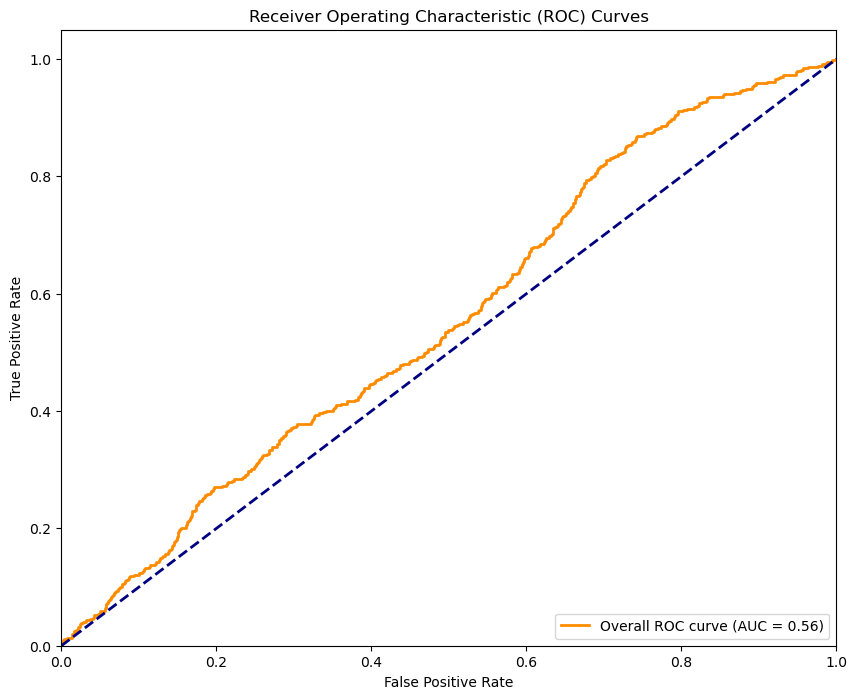

In [6]:
all_dir_results = []
print (data_folder)
for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
        result = process_directory(sequence_length, stride, input_size, data_path, base_config, TCN, noise_scheduler)
        all_dir_results.append(result)

# Compute and plot overall metrics
all_labels = np.concatenate([res['labels'] for res in all_dir_results])
all_scores = np.concatenate([res['scores'] for res in all_dir_results])

print("\nOverall IQR outliers classification report")
print(classification_report(all_labels, (np.array(all_scores) > 2).astype(int)))

fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

all_dir_results.append({
    'dir': 'Overall',
    'labels': all_labels,
    'scores': all_scores,
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
})

# Save results to CSV
results_df = pd.DataFrame(all_dir_results)
results_df.to_csv(os.path.join(config.output_dir, f"per_directory_roc_results_{config.num_epochs}.csv"))

# Plot ROC curves
plt.figure(figsize=(10, 8))
for res in all_dir_results:
    if res['dir'] == 'Overall':
        plt.plot(res['fpr'], res['tpr'], color='darkorange', lw=2, label=f"Overall (AUC = {res['roc_auc']:.2f})")
    else:
        plt.plot(res['fpr'], res['tpr'], lw=1, label=f"{res['dir']} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"one_by_one_roc_curves_{config.num_epochs}.png"))
plt.close()

print(f"\nOverall ROC AUC: {roc_auc:.4f}")

# plot ans save only the overall roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"one_by_oneoverall_roc_curve_{config.num_epochs}.png"))
plt.show()

NameError: name 'config' is not defined

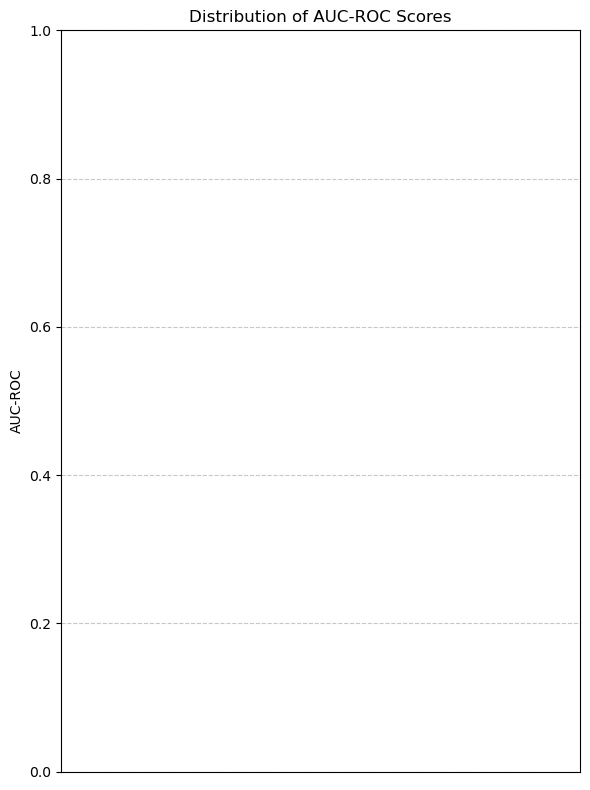

In [5]:
# Extract AUC-ROC scores for the box plot
auc_scores = [res['roc_auc'] for res in all_dir_results if res['dir'] != 'Overall']

# Create the figure
plt.figure(figsize=(6, 8))  # Adjust the width to make it narrower

# Plot AUC-ROC box plot
sns.boxplot(y=auc_scores, color='lightpink', width=0.3)  # Reduced width for a narrower box

# Set the y-axis limits from 0 to 1
plt.ylim(0, 1)

# Customize the plot
plt.ylabel('AUC-ROC')
plt.title('Distribution of AUC-ROC Scores')

# Remove x-axis label and ticks
plt.xlabel('')
plt.xticks([])

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(config.output_dir, f"one_b_one_auc_roc_distribution_{config.num_epochs}.png"))
plt.close()

# Print summary statistics
"""print(f"\nAUC-ROC Score Distribution:")
print(f"Mean: {np.mean(auc_scores):.4f}")
print(f"Median: {np.median(auc_scores):.4f}")
print(f"Min: {np.min(auc_scores):.4f}")
print(f"Max: {np.max(auc_scores):.4f}")"""